In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Divvy_Trips_2018_Q1.csv')

### EDA

In [3]:
df.head(2)

,01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387145 entries, 0 to 387144
Data columns (total 12 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   01 - Rental Details Rental ID                     387145 non-null  int64  
 1   01 - Rental Details Local Start Time              387145 non-null  object 
 2   01 - Rental Details Local End Time                387145 non-null  object 
 3   01 - Rental Details Bike ID                       387145 non-null  int64  
 4   01 - Rental Details Duration In Seconds Uncapped  387145 non-null  object 
 5   03 - Rental Start Station ID                      387145 non-null  int64  
 6   03 - Rental Start Station Name                    387145 non-null  object 
 7   02 - Rental End Station ID                        387145 non-null  int64  
 8   02 - Rental End Station Name                      387145 non-null  object 
 9   User

In [5]:
print('max date_start',df['01 - Rental Details Local Start Time'].max())
print('min date_start',df['01 - Rental Details Local Start Time'].min())

max date_start 2018-03-31 23:53:38
min date_start 2018-01-01 00:12:00


In [6]:
print('max_date_end',df['01 - Rental Details Local End Time'].max())
print('min_date_end',df['01 - Rental Details Local End Time'].min())

max_date_end 2018-08-26 21:19:34
min_date_end 2018-01-01 00:17:23


In [7]:
df['User Type'].value_counts()

Subscriber    364702
Customer       22443
Name: User Type, dtype: int64

<AxesSubplot: >

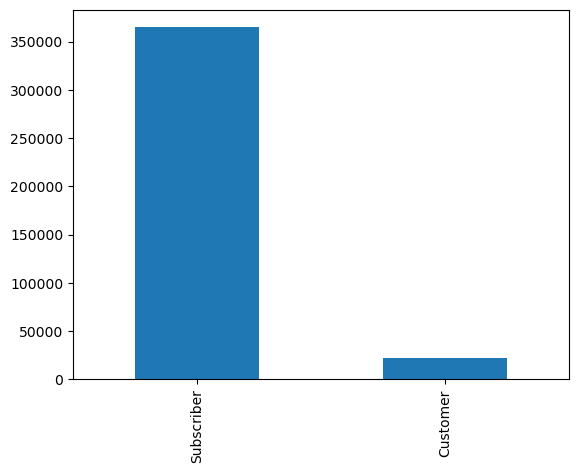

In [8]:
df['User Type'].value_counts().plot(kind='bar')

In [9]:
df['Member Gender'].value_counts()

Male      293576
Female     71076
Name: Member Gender, dtype: int64

<AxesSubplot: >

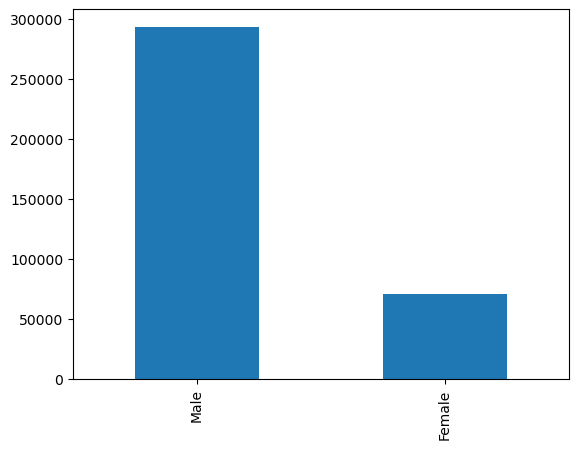

In [10]:
df['Member Gender'].value_counts().plot(kind='bar')

In [11]:
df['03 - Rental Start Station Name'].value_counts()

Canal St & Adams St             8483
Clinton St & Washington Blvd    7689
Clinton St & Madison St         6234
Kingsbury St & Kinzie St        4819
Canal St & Madison St           4696
                                ... 
Bennett Ave & 79th St              1
Racine Ave & 61st St               1
Ashland Ave & 63rd St              1
Racine Ave & 65th St               1
Central Park Blvd & 5th Ave        1
Name: 03 - Rental Start Station Name, Length: 576, dtype: int64

<AxesSubplot: >

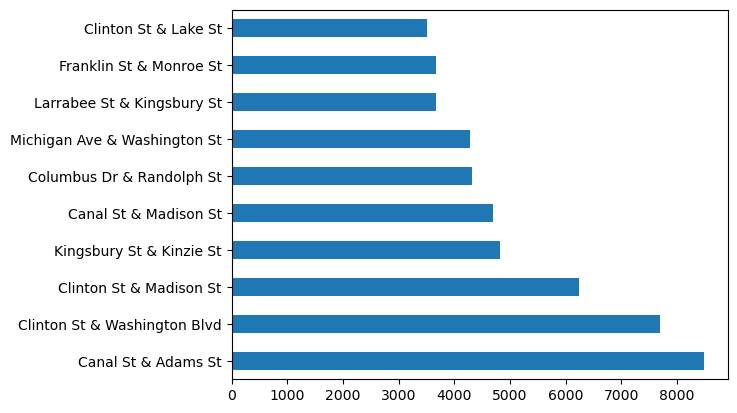

In [12]:
df['03 - Rental Start Station Name'].value_counts().head(10).plot(kind='barh')

### Data Transformation

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387145 entries, 0 to 387144
Data columns (total 12 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   01 - Rental Details Rental ID                     387145 non-null  int64  
 1   01 - Rental Details Local Start Time              387145 non-null  object 
 2   01 - Rental Details Local End Time                387145 non-null  object 
 3   01 - Rental Details Bike ID                       387145 non-null  int64  
 4   01 - Rental Details Duration In Seconds Uncapped  387145 non-null  object 
 5   03 - Rental Start Station ID                      387145 non-null  int64  
 6   03 - Rental Start Station Name                    387145 non-null  object 
 7   02 - Rental End Station ID                        387145 non-null  int64  
 8   02 - Rental End Station Name                      387145 non-null  object 
 9   User

In [14]:
df.head(2)

,01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0


In [15]:
raw_data = df.copy() # original data back up

In [16]:
df.columns.to_list()

['01 - Rental Details Rental ID',
 '01 - Rental Details Local Start Time',
 '01 - Rental Details Local End Time',
 '01 - Rental Details Bike ID',
 '01 - Rental Details Duration In Seconds Uncapped',
 '03 - Rental Start Station ID',
 '03 - Rental Start Station Name',
 '02 - Rental End Station ID',
 '02 - Rental End Station Name',
 'User Type',
 'Member Gender',
 '05 - Member Details Member Birthday Year']

In [17]:
df_subset = df[['01 - Rental Details Local Start Time',
 '01 - Rental Details Local End Time',
 '01 - Rental Details Duration In Seconds Uncapped',
 '03 - Rental Start Station Name',
 '02 - Rental End Station Name',
 'User Type',
 'Member Gender',
 '05 - Member Details Member Birthday Year']] # stores just columns needed for the analysis

In [18]:
df_subset.head(2)

,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station Name,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,2018-01-01 00:12:00,2018-01-01 00:17:23,323.0,Damen Ave & Pierce Ave,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,2018-01-01 00:41:35,2018-01-01 00:47:52,377.0,Winthrop Ave & Lawrence Ave,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0


In [19]:
df.rename(columns={'01 - Rental Details Rental ID':'rental_id','01 - Rental Details Local Start Time':'start_time',
                  "01 - Rental Details Local End Time":'end_time','01 - Rental Details Bike ID':'bike_id',
                  '01 - Rental Details Duration In Seconds Uncapped':'duration_sec',
                  '03 - Rental Start Station ID':'start_sta_id','03 - Rental Start Station Name':'start_sta_name',
                  '02 - Rental End Station ID':'end_sta_id','02 - Rental End Station Name':'end_sta_name',
                  'User Type':'user','Member Gender':'gender','05 - Member Details Member Birthday Year':'birthday_year'},
         inplace=True) # change the name of the columns

In [20]:
df.head(2)

,rental_id,start_time,end_time,bike_id,duration_sec,start_sta_id,start_sta_name,end_sta_id,end_sta_name,user,gender,birthday_year
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387145 entries, 0 to 387144
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   rental_id       387145 non-null  int64  
 1   start_time      387145 non-null  object 
 2   end_time        387145 non-null  object 
 3   bike_id         387145 non-null  int64  
 4   duration_sec    387145 non-null  object 
 5   start_sta_id    387145 non-null  int64  
 6   start_sta_name  387145 non-null  object 
 7   end_sta_id      387145 non-null  int64  
 8   end_sta_name    387145 non-null  object 
 9   user            387145 non-null  object 
 10  gender          364652 non-null  object 
 11  birthday_year   364823 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 35.4+ MB


In [22]:
df['birthday_year'].unique()

array([1988., 1984., 1989., 1983., 1994., 1998., 1990.,   nan, 1992.,
       1985., 1993., 1979., 1981., 1986., 1991., 1978., 1982., 1987.,
       1962., 1960., 1980., 1959., 1972., 1966., 1975., 1974., 1976.,
       2000., 1969., 1971., 1965., 1996., 1961., 1995., 1973., 1951.,
       1940., 1970., 1967., 1953., 1950., 1963., 1997., 1977., 1955.,
       1946., 1964., 1968., 1957., 1954., 1958., 1956., 1952., 1944.,
       1999., 1918., 1948., 1949., 1921., 1939., 1906., 1942., 1923.,
       1943., 1945., 2003., 1934., 1947., 1899., 2001., 1900., 1930.,
       1916., 1931., 1941., 1933.])

In [23]:
df.isnull().sum()

rental_id             0
start_time            0
end_time              0
bike_id               0
duration_sec          0
start_sta_id          0
start_sta_name        0
end_sta_id            0
end_sta_name          0
user                  0
gender            22493
birthday_year     22322
dtype: int64

In [24]:
# df[df['birthday_year'].isna()] 

#df.isnull().any()

In [25]:
gender_null = df[df['gender'].isna()]
birthday_null = df[df['birthday_year'].isna()]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387145 entries, 0 to 387144
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   rental_id       387145 non-null  int64  
 1   start_time      387145 non-null  object 
 2   end_time        387145 non-null  object 
 3   bike_id         387145 non-null  int64  
 4   duration_sec    387145 non-null  object 
 5   start_sta_id    387145 non-null  int64  
 6   start_sta_name  387145 non-null  object 
 7   end_sta_id      387145 non-null  int64  
 8   end_sta_name    387145 non-null  object 
 9   user            387145 non-null  object 
 10  gender          364652 non-null  object 
 11  birthday_year   364823 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 35.4+ MB


In [27]:
df.dropna(inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364648 entries, 0 to 387144
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   rental_id       364648 non-null  int64  
 1   start_time      364648 non-null  object 
 2   end_time        364648 non-null  object 
 3   bike_id         364648 non-null  int64  
 4   duration_sec    364648 non-null  object 
 5   start_sta_id    364648 non-null  int64  
 6   start_sta_name  364648 non-null  object 
 7   end_sta_id      364648 non-null  int64  
 8   end_sta_name    364648 non-null  object 
 9   user            364648 non-null  object 
 10  gender          364648 non-null  object 
 11  birthday_year   364648 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 36.2+ MB


In [29]:
df.isna().sum() # confirms that the null values are gone

rental_id         0
start_time        0
end_time          0
bike_id           0
duration_sec      0
start_sta_id      0
start_sta_name    0
end_sta_id        0
end_sta_name      0
user              0
gender            0
birthday_year     0
dtype: int64

In [30]:
df.duplicated().sum() #no duplicated values

0

In [31]:
# # df['start_time'] = pd.to_datetime(df['start_time'])
# # df['end_time'] = pd.to_datetime(df['end_time'])
# df['duration_sec'] = df['duration_sec'].astype(float)
# df['birthday_year'] = df['birthday_year'].astype(int)

In [32]:
df['duration_sec'] = df['duration_sec'].str.replace(',','')

In [33]:
df['duration_sec'] = df['duration_sec'].astype(float) #needs to be changed

In [34]:
df['duration_min'] = df['duration_sec'].astype(int) / 60 #creates a new column with duration in minutes

In [35]:
df['birthday_year'] = df['birthday_year'].astype(int)

In [36]:
df.head(2)

,rental_id,start_time,end_time,bike_id,duration_sec,start_sta_id,start_sta_name,end_sta_id,end_sta_name,user,gender,birthday_year,duration_min
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988,5.383333
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984,6.283333


In [37]:
df['start_time'] = pd.to_datetime(df['start_time']) #change the format of the values to datetime
df['end_time'] = pd.to_datetime(df['end_time'])

In [38]:
df.info() #confirms the changes made

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364648 entries, 0 to 387144
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   rental_id       364648 non-null  int64         
 1   start_time      364648 non-null  datetime64[ns]
 2   end_time        364648 non-null  datetime64[ns]
 3   bike_id         364648 non-null  int64         
 4   duration_sec    364648 non-null  float64       
 5   start_sta_id    364648 non-null  int64         
 6   start_sta_name  364648 non-null  object        
 7   end_sta_id      364648 non-null  int64         
 8   end_sta_name    364648 non-null  object        
 9   user            364648 non-null  object        
 10  gender          364648 non-null  object        
 11  birthday_year   364648 non-null  int64         
 12  duration_min    364648 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(5), object(4)
memory usage: 38.9+ MB


In [39]:
df['duration_min'] = df['duration_min'].round().astype(int) #change the type of value

In [40]:
df.drop(columns=['duration_sec'],axis=1,inplace=True) # removes column

In [41]:
df.head()

,rental_id,start_time,end_time,bike_id,start_sta_id,start_sta_name,end_sta_id,end_sta_name,user,gender,birthday_year,duration_min
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988,5
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984,6
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989,48
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983,12
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989,3


In [42]:
df['duration_min'].max() / 60

3766.0

In [43]:
3766 / 24

156.91666666666666

### Stats

In [44]:
df.describe(include='all',datetime_is_numeric=True) #checking some stats

,rental_id,start_time,end_time,bike_id,start_sta_id,start_sta_name,end_sta_id,end_sta_name,user,gender,birthday_year,duration_min
count,3.646480e+05,364648,364648,364648.000000,364648.000000,364648,364648.000000,364648,364648,364648,364648.000000,364648.000000
unique,NaN,NaN,NaN,NaN,NaN,571,NaN,574,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Canal St & Adams St,NaN,Canal St & Adams St,Subscriber,Male,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,8381,NaN,8967,364542,293576,NaN,NaN
mean,1.776701e+07,2018-02-21 00:07:15.719806464,2018-02-21 00:19:11.202839808,3685.721148,185.213027,NaN,185.146067,NaN,NaN,NaN,1980.638835,11.923194
min,1.753670e+07,2018-01-01 00:12:00,2018-01-01 00:17:23,1.000000,2.000000,NaN,2.000000,NaN,NaN,NaN,1899.000000,1.000000
25%,1.765205e+07,2018-01-28 20:21:44.750000128,2018-01-28 20:31:21.249999872,1966.000000,75.000000,NaN,75.000000,NaN,NaN,NaN,1974.000000,5.000000
50%,1.776643e+07,2018-02-25 22:51:36,2018-02-25 23:13:41.500000,3869.000000,161.000000,NaN,161.000000,NaN,NaN,NaN,1984.000000,8.000000
75%,1.788138e+07,2018-03-14 18:56:44.249999872,2018-03-14 19:07:41,5540.000000,281.000000,NaN,282.000000,NaN,NaN,NaN,1989.000000,13.000000
max,1.800053e+07,2018-03-31 23:53:38,2018-07-01 18:56:21,6471.000000,627.000000,NaN,627.000000,NaN,NaN,NaN,2003.000000,225960.000000


In [45]:
print('Longest ride:', df['duration_min'].max()) #info with outliers included
print('Shortest ride:', df['duration_min'].min())
print('Average ride:', df['duration_min'].mean().round())

Longest ride: 225960
Shortest ride: 1
Average ride: 12.0


<AxesSubplot: title={'center': 'Shows Outliers in Ride Duration'}>

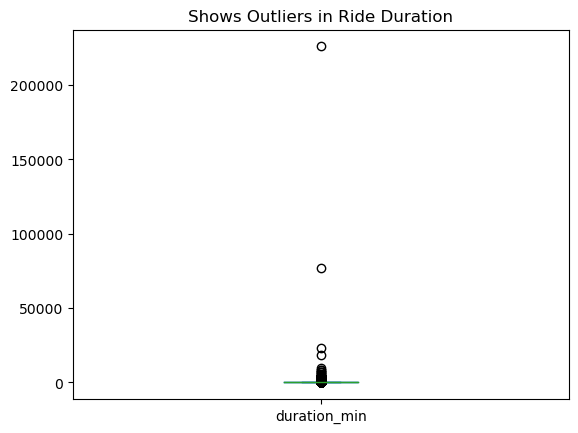

In [46]:
plt.title('Shows Outliers in Ride Duration') #shows outliers
df['duration_min'].plot(kind='box') 

In [47]:
df['duration_min'].describe() #we can see the magnitude

count    364648.000000
mean         11.923194
std         401.371014
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max      225960.000000
Name: duration_min, dtype: float64

In [48]:
df[df['duration_min'] > 8000] #filters values that are > 8000

,rental_id,start_time,end_time,bike_id,start_sta_id,start_sta_name,end_sta_id,end_sta_name,user,gender,birthday_year,duration_min
20345,17563555,2018-01-09 18:18:46,2018-01-16 09:53:44,3652,53,Wells St & Huron St,88,Racine Ave & Randolph St,Subscriber,Female,1986,9575
79287,17634739,2018-01-25 19:56:04,2018-07-01 18:56:21,5956,585,Cottage Grove Ave & 83rd St,392,Perry Ave & 69th St,Subscriber,Male,1997,225960
130554,17697264,2018-02-08 17:25:06,2018-02-14 08:41:20,6388,96,Desplaines St & Randolph St,207,Emerald Ave & 28th St,Subscriber,Male,1981,8116
138123,17706781,2018-02-13 15:50:42,2018-03-01 16:08:52,2054,71,Morgan St & Lake St,360,DIVVY Map Frame B/C Station,Subscriber,Male,1987,23058
163996,17738010,2018-02-20 16:01:07,2018-03-05 07:24:03,147,422,DuSable Museum,204,Prairie Ave & Garfield Blvd,Subscriber,Male,1969,18203
187899,17766193,2018-02-25 20:13:52,2018-03-03 14:12:32,2986,464,Damen Ave & Foster Ave,242,Damen Ave & Leland Ave,Subscriber,Male,1964,8279
254372,17844082,2018-03-09 07:51:34,2018-05-01 13:25:33,972,140,Dearborn Pkwy & Delaware Pl,56,Desplaines St & Kinzie St,Subscriber,Male,1991,76594


In [49]:
print("Average users' birthday year",df['birthday_year'].mean().round()) #shows some stats
print('Shortest ride:', df['duration_min'].min())
print('Longest ride:', df['duration_min'].max())

Average users' birthday year 1981.0
Shortest ride: 1
Longest ride: 225960


## Analysis

In [50]:
# Search for outliers

In [51]:
df['user'].value_counts(normalize=True) * 100 #shows the percentage

Subscriber    99.970931
Customer       0.029069
Name: user, dtype: float64

####  Identifying outliers

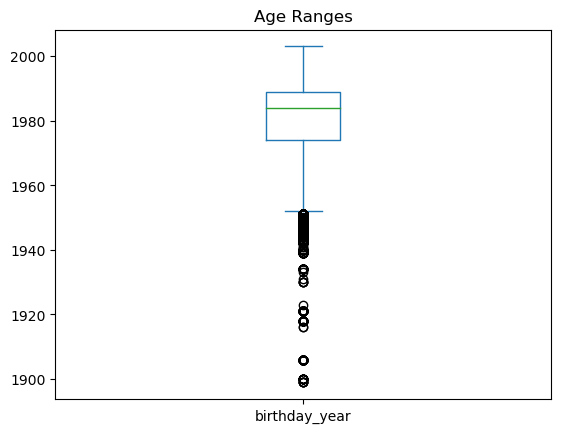

In [52]:
plt.title('Age Ranges')
df['birthday_year'].plot(kind='box') #shows outliers
plt.show()

In [53]:
df = df[df['birthday_year'] >= 1964] #filters date based on people who were born in 1964 on

In [54]:
df[df['birthday_year'] < 1964] # confirms the filtering was successful 

,rental_id,start_time,end_time,bike_id,start_sta_id,start_sta_name,end_sta_id,end_sta_name,user,gender,birthday_year,duration_min


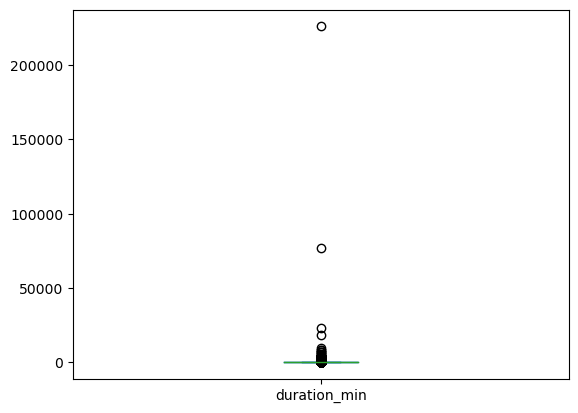

In [55]:
df['duration_min'].plot(kind='box') #shows outliers
plt.show()

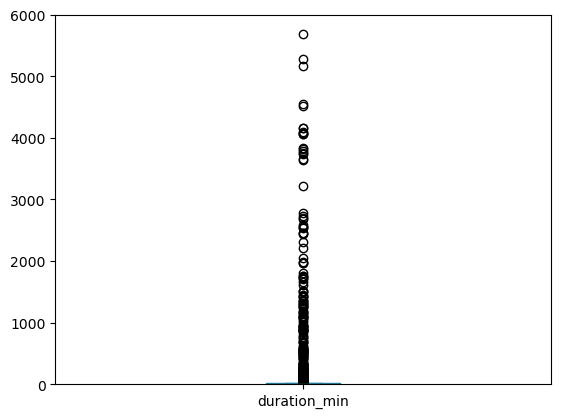

In [56]:
df['duration_min'].plot(kind='box') #closer view of the values
plt.ylim(0,6000)
plt.show()

In [57]:
duration_outliers = df[df['duration_min'] > 4000] #stores the outliers for further analysis

In [58]:
df = df[df['duration_min'] <= 4000] # removes outliers from the dataframe

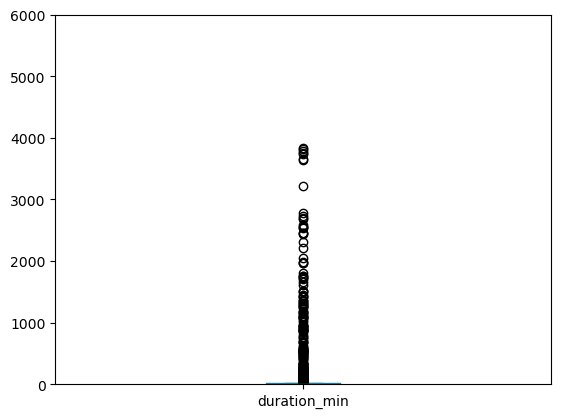

In [59]:
df['duration_min'].plot(kind='box') #closer view of the values without outliers
plt.ylim(0,6000)
plt.show()

In [60]:
df.head(2)

,rental_id,start_time,end_time,bike_id,start_sta_id,start_sta_name,end_sta_id,end_sta_name,user,gender,birthday_year,duration_min
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988,5
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984,6


In [61]:
#50000 / 60 

In [62]:
#834 / 24

In [63]:
#df['duration_min'].describe()

In [64]:
#4000 / 60

In [65]:
#67 / 24

In [66]:
pd.DataFrame(df['user'].value_counts(normalize=True) * 100).round(2)

,user
Subscriber,99.97
Customer,0.03


In [67]:
pd.DataFrame(df['user'].value_counts())

,user
Subscriber,327082
Customer,105


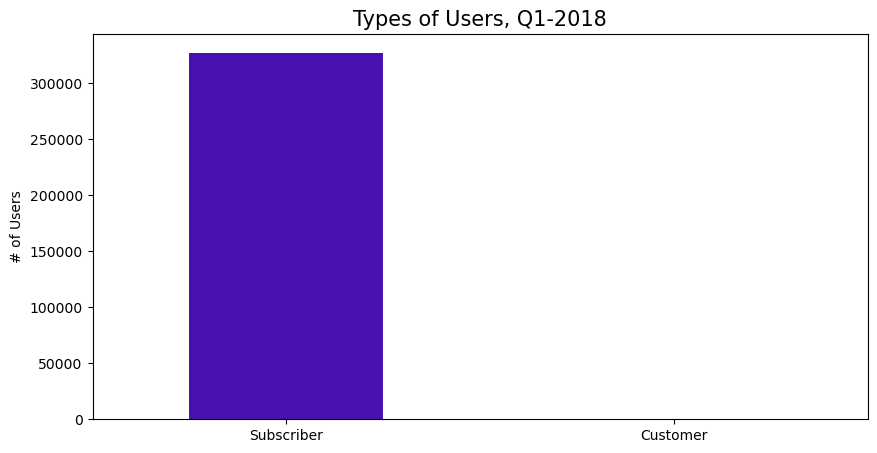

In [68]:
plt.title('Types of Users, Q1-2018',fontsize=15)
df['user'].value_counts().plot(kind='bar',color=['#4912b0','#2446b5'],figsize=(10,5))
plt.xticks(rotation=0,fontsize=10)
plt.ylabel('# of Users')
plt.show()

In [69]:
df['start_time'].dt.day_name().value_counts()

Wednesday    58923
Thursday     56684
Friday       53720
Tuesday      52821
Monday       48686
Saturday     30798
Sunday       25555
Name: start_time, dtype: int64

### Use of Bikes by Day

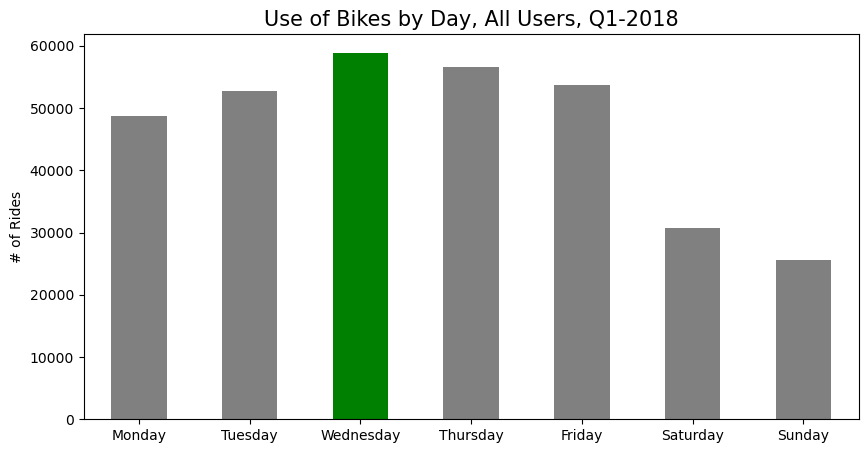

In [70]:
colors_day = ['gray','gray','g','gray','gray','gray','gray']
plt.figure(figsize=(10,5)) 
plt.title('Use of Bikes by Day, All Users, Q1-2018',fontsize=15)
df['start_time'].dt.day_name().value_counts(sort=False).plot(kind='bar',color=colors_day)
plt.xticks(rotation=0,fontsize=10)
plt.ylabel('# of Rides')
plt.show()

In [71]:
# df['start_time'].dt.day.value_counts() information about everyday

In [72]:
df['start_time'].dt.day_name().value_counts(sort=False)

Monday       48686
Tuesday      52821
Wednesday    58923
Thursday     56684
Friday       53720
Saturday     30798
Sunday       25555
Name: start_time, dtype: int64

In [73]:
pd.DataFrame(df.groupby(by=['user'])['duration_min'].mean())

,duration_min
user,
Customer,14.733333
Subscriber,10.731731


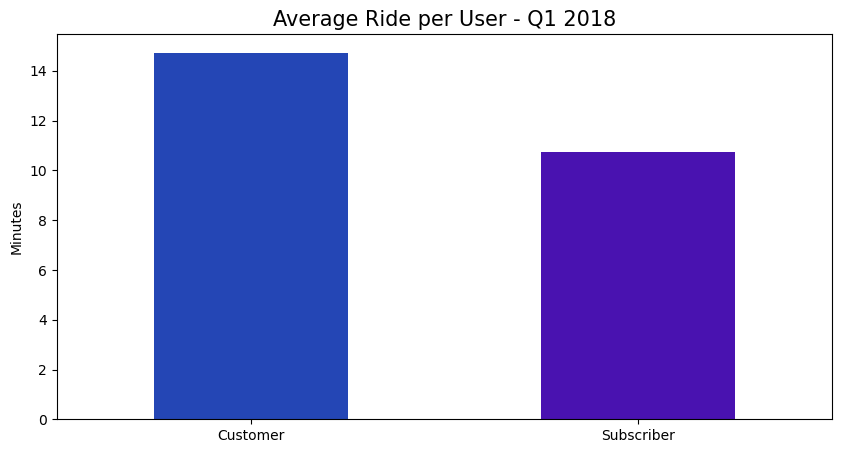

In [74]:
colors_users = ['#2446b5','#4912b0']
plt.title('Average Ride per User - Q1 2018',fontsize=15)
df.groupby(by=['user'])['duration_min'].mean().plot(kind='bar',figsize=(10,5),color=colors_users)
plt.xlabel(None)
plt.xticks(rotation=0)
plt.ylabel('Minutes')
plt.show()

In [75]:
pd.DataFrame(df.groupby(by=['user','gender'])['duration_min'].mean())

duration_min
user       gender              
Customer   Female     22.941176
           Male       13.147727
Subscriber Female     11.809720
           Male       10.463409

###  Average Ride per User & Gender

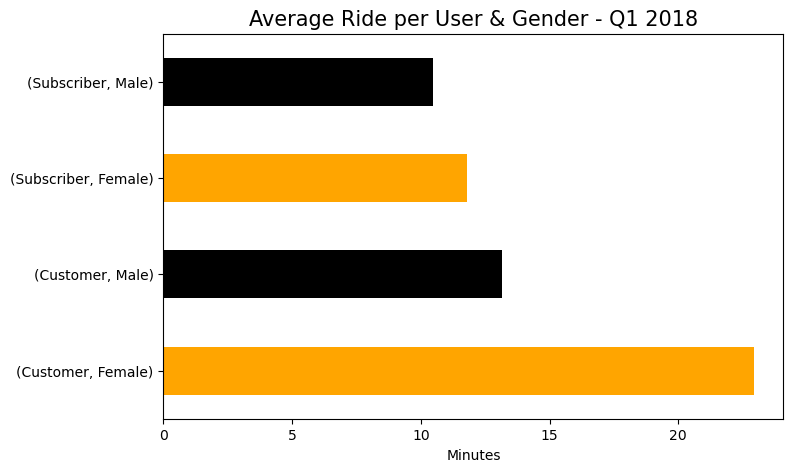

In [76]:
colors_ug = ['orange','black','orange','black']
plt.title('Average Ride per User & Gender - Q1 2018',fontsize=15)
df.groupby(by=['user','gender'])['duration_min'].mean().plot(kind='barh',color=colors_ug,figsize=(8,5))
plt.ylabel(None)
plt.xlabel('Minutes')
plt.show()

In [77]:
top_10 = df['start_sta_name'].value_counts().head(10)

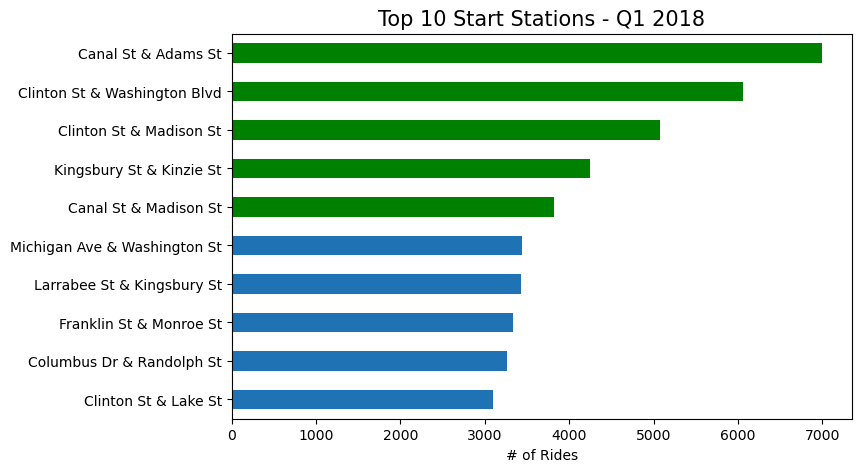

In [78]:
colors_sta = ['#1f73b4','#1f73b4','#1f73b4','#1f73b4','#1f73b4','g','g','g','g','g']
plt.title('Top 10 Start Stations - Q1 2018',fontsize=15)
top_10.sort_values(ascending=True).plot(kind='barh',figsize=(8,5),color=colors_sta)
plt.xlabel('# of Rides')
plt.show()

In [79]:
pd.pivot_table(df,index='user',columns=['gender'],values='duration_min')

gender,Female,Male
user,,
Customer,22.941176,13.147727
Subscriber,11.809720,10.463409


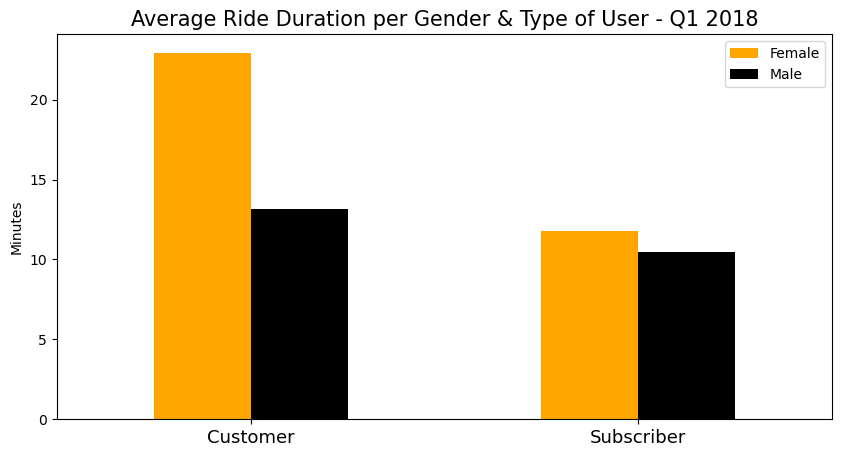

In [80]:
pd.pivot_table(df,index='user',columns=['gender'],values='duration_min').plot(kind='bar',color=colors_ug,figsize=(10,5))
plt.title('Average Ride Duration per Gender & Type of User - Q1 2018',fontsize=15)
plt.xlabel(None)
plt.xticks(rotation=0,fontsize=13)
plt.ylabel('Minutes')
plt.legend()
plt.show()


###  Use of Bikes by Day

In [81]:
#df[df['user'] == 'Subscriber']['duration_min'].mean()

In [82]:
subscribers = df[df['user'] == 'Subscriber'] #filters only subscribers

In [83]:
subscribers['start_time'].dt.day_name().value_counts()

Wednesday    58884
Thursday     56678
Friday       53703
Tuesday      52808
Monday       48677
Saturday     30784
Sunday       25548
Name: start_time, dtype: int64

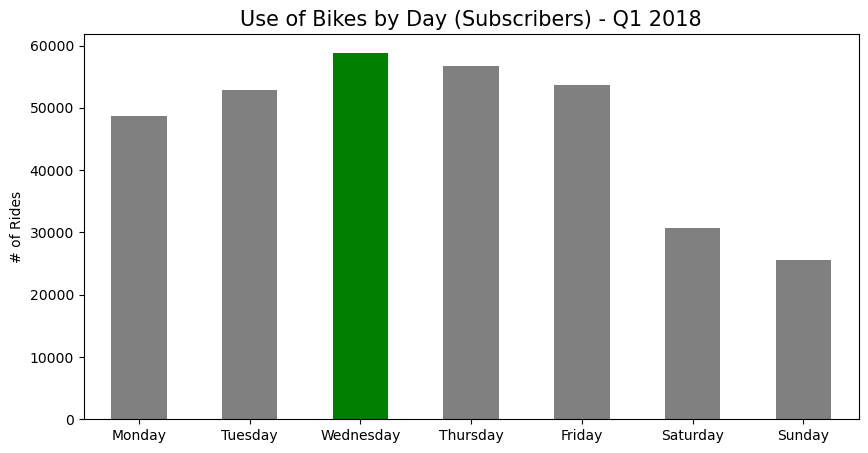

In [84]:
subscribers['start_time'].dt.day_name().value_counts(sort=False).plot(kind='bar',figsize=(10,5),color=colors_day)
plt.title('Use of Bikes by Day (Subscribers) - Q1 2018',fontsize=15)
plt.xlabel(None)
plt.ylabel('# of Rides')
plt.xticks(rotation=0,fontsize=10)
plt.show()

In [85]:
customers = df[df['user'] == 'Customer'] #filters only customers

In [86]:
customers['start_time'].dt.day_name().value_counts()

Wednesday    39
Friday       17
Saturday     14
Tuesday      13
Monday        9
Sunday        7
Thursday      6
Name: start_time, dtype: int64

#### Data transformation 

In [87]:
customer_days = customers['start_time'].dt.day_name().value_counts().reset_index()

In [88]:
customer_days.rename(columns={'index':'days'},inplace=True)
customer_days.index.name = 'index'

In [89]:
customer_days.rename(index={0:2,1:4,2:5,3:1,4:0,5:6,6:3},inplace=True)

In [90]:
customer_days = customer_days.sort_values(by='index')

In [91]:
customer_days.reset_index(drop=True,inplace=True)

In [92]:
customer_days.set_index('days',inplace=True)

In [93]:
# the transformation makes the weekdays go in order

In [94]:
# customer_days.plot(kind='bar',figsize=(10,5),color='gray',legend=None)
# plt.title('Use of Bikes by Day (customers) - Q1 2024')
# plt.xlabel(None)
# plt.ylabel('# of Rides')
# plt.xticks(rotation=0,fontsize=10)
# plt.show()

In [95]:
# customers['start_time'].dt.day_name().value_counts(sort=False)
# plt.title('Use of Bikes by Day (Customers) - Q1 2024')
# plt.xlabel(None)
# plt.ylabel('# of Rides')
# plt.xticks(rotation=0,fontsize=10)
# plt.show()

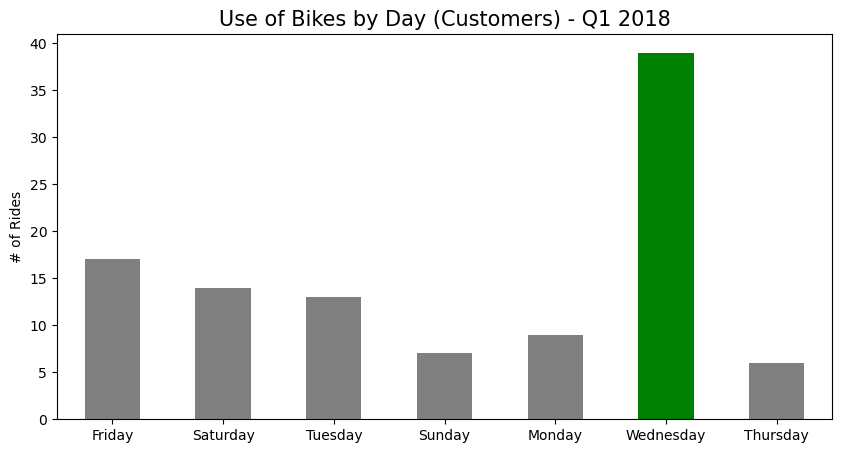

In [96]:
colors_day = ['gray','gray','gray','gray','gray','g','gray']
customers['start_time'].dt.day_name().value_counts(sort=False).plot(kind='bar',figsize=(10,5),color=colors_day)
plt.title('Use of Bikes by Day (Customers) - Q1 2018',fontsize=15)
plt.xlabel(None)
plt.ylabel('# of Rides')
plt.xticks(rotation=0,fontsize=10)
plt.show()

#### Data Transformation

In [97]:
subs_days = subscribers[['start_time','duration_min']]

In [98]:
subs_days['days'] = subs_days['start_time'].dt.day_name()

/tmp/ipykernel_339483/3814086603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs_days['days'] = subs_days['start_time'].dt.day_name()


In [99]:
subs_days = subs_days.groupby(by=['days'])['duration_min'].mean()

In [100]:
subs_days = pd.DataFrame(subs_days).reset_index()

In [101]:
subs_days.index.name = 'index'

In [102]:
subs_days.rename(index={0:4,1:0,2:5,3:6,4:3,5:1,6:2},inplace=True)

In [103]:
subs_days.sort_index(inplace=True)

In [104]:
subs_days.reset_index(drop=True,inplace=True)

In [105]:
subs_days.reset_index(inplace=True)

In [106]:
subs_days.drop(columns=['index'],inplace=True)

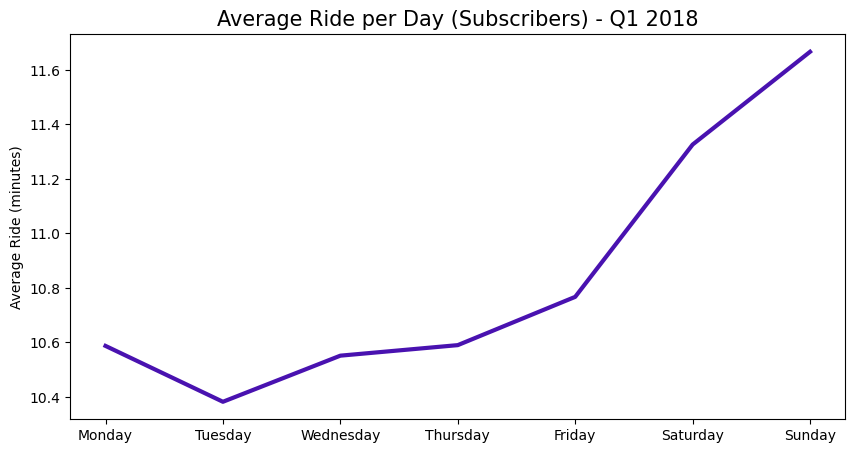

In [107]:
subs_days.set_index('days').plot(kind='line',figsize=(10,5),linewidth='3',legend=None,color='#4912b0')
plt.title('Average Ride per Day (Subscribers) - Q1 2018',fontsize=15)
plt.xlabel(None)
plt.ylabel('Average Ride (minutes)')
plt.show()

# WORK ON THE DOTTED LINE

#### Data Transformation

In [108]:
cust_days = customers[['start_time','duration_min']]

In [109]:
cust_days['days'] = cust_days['start_time'].dt.day_name()

/tmp/ipykernel_339483/2768629939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_days['days'] = cust_days['start_time'].dt.day_name()


In [110]:
cust_days = cust_days.groupby(by=['days'])['duration_min'].mean()

In [111]:
cust_days = cust_days.reset_index()

In [112]:
cust_days.index.name = 'index'

In [113]:
cust_days.rename({0:4,1:0,2:5,3:6,4:3,5:1,6:2},inplace=True)

In [114]:
cust_days.sort_index(inplace=True)

In [115]:
cust_days.set_index('days',inplace=True)

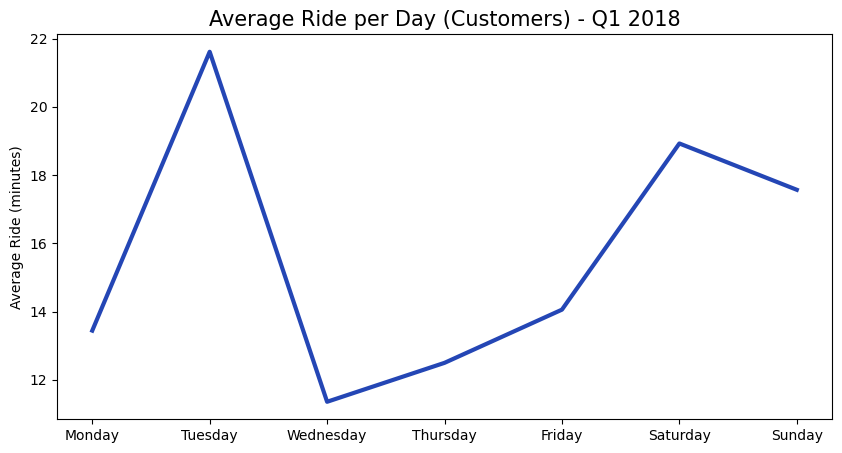

In [116]:
cust_days.plot(kind='line',figsize=(10,5),linewidth='3',legend=None,color='#2446b5')
plt.title('Average Ride per Day (Customers) - Q1 2018',fontsize=15)
plt.ylabel('Average Ride (minutes)')
plt.xlabel(None)
plt.show()

### Average Ride per Day (Subscribers)

In [117]:
#subs_days.groupby(by=['days'])['duration_min'].mean().sort_values().plot(kind='bar') # FIX THE DAYS ORDER

In [118]:
test = subs_days.groupby(by=['days'])['duration_min'].mean()

In [119]:
test = pd.DataFrame(test).reset_index()

In [120]:
test

,days,duration_min
0,Friday,10.767350
1,Monday,10.587423
2,Saturday,11.326208
3,Sunday,11.666667
4,Thursday,10.590247
5,Tuesday,10.382385
6,Wednesday,10.551593


In [121]:
test.rename(index={0:4,1:0,2:5,3:6,4:3,5:1,6:2},inplace=True)

In [122]:
test.index.name = 'index'

In [123]:
test = test.sort_values(by=['index'])

In [124]:
test.reset_index(drop=True,inplace=True)

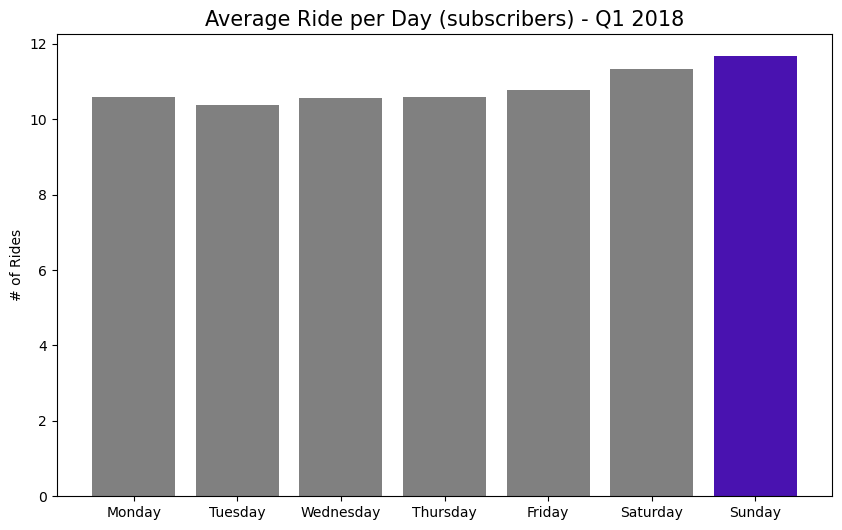

In [125]:
colors1 = ['gray','gray','gray','gray','gray','gray','#4912b0']
plt.figure(figsize=(10,6))
plt.title('Average Ride per Day (subscribers) - Q1 2018',fontsize=15)
plt.bar(x=test['days'],height=test['duration_min'],color=colors1)
plt.ylabel('# of Rides')
plt.show()

### Average Ride per Day (Customers) 

In [126]:
test_cust = cust_days.groupby(by=['days'])['duration_min'].mean()

In [127]:
test_cust = pd.DataFrame(test_cust).reset_index()

In [128]:
test_cust

,days,duration_min
0,Friday,14.058824
1,Monday,13.444444
2,Saturday,18.928571
3,Sunday,17.571429
4,Thursday,12.500000
5,Tuesday,21.615385
6,Wednesday,11.358974


In [129]:
test_cust.rename(index={0:4,1:0,2:5,3:6,4:3,5:1,6:2},inplace=True)

In [130]:
test_cust.index.name = 'index'

In [131]:
test_cust = test_cust.sort_values(by=['index'])

In [132]:
test_cust.reset_index(drop=True,inplace=True)

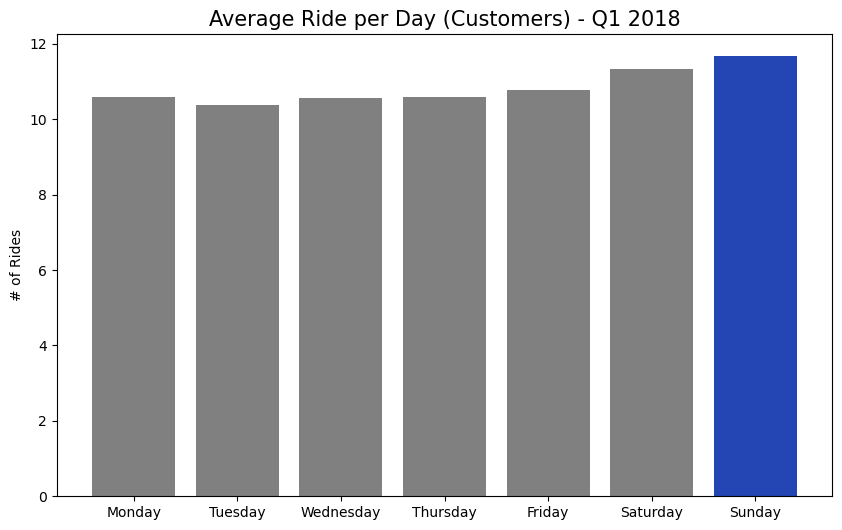

In [133]:
colors2 = ['gray','gray','gray','gray','gray','gray','#2446b5']
plt.figure(figsize=(10,6))
plt.title('Average Ride per Day (Customers) - Q1 2018',fontsize=15)
plt.bar(x=test['days'],height=test['duration_min'],color=colors2)
plt.ylabel('# of Rides')
plt.show()

### Monthly Stats

In [134]:
def test(date):
    current_date = 2024
    print(current_date - date) #functions that returns the age of users

In [135]:
test(1976)

48


In [136]:
pd.DataFrame(df['start_time'].dt.month_name().value_counts())

,start_time
March,142861
January,95319
February,89007


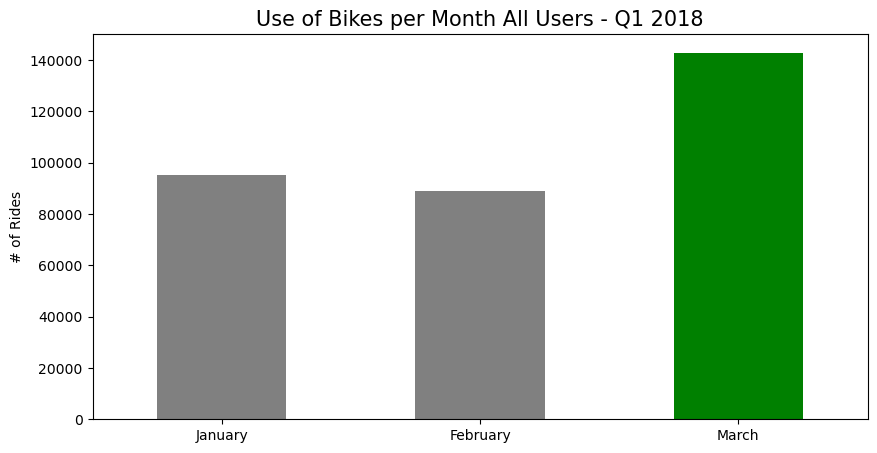

In [137]:
colors = ['green','orange','pink']
plt.title('Use of Bikes per Month All Users - Q1 2018',fontsize=15)
df['start_time'].dt.month_name().value_counts(sort=False).plot(kind='bar',figsize=(10,5),color=['gray','gray','g'])
plt.xticks(rotation=0)
plt.ylabel('# of Rides')
plt.show()

### Use of Bikes per Month - SUBSCRIBERS

In [138]:
pd.DataFrame(subscribers['start_time'].dt.month_name().value_counts())

,start_time
March,142812
January,95308
February,88962


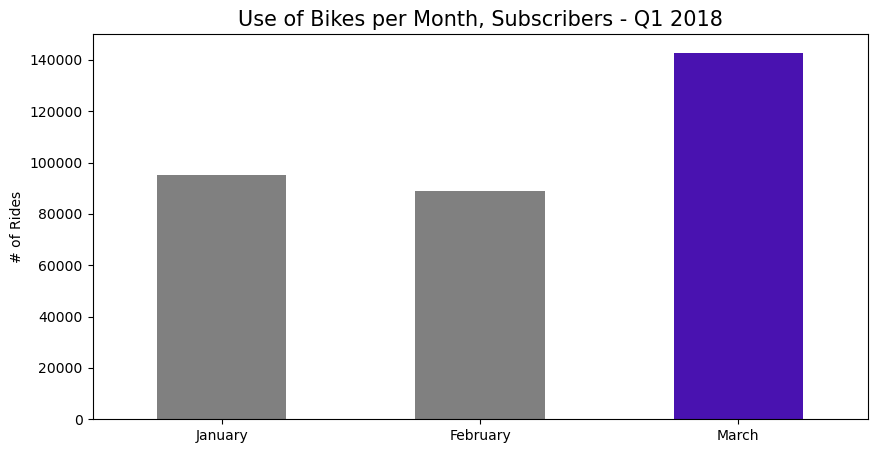

In [139]:
colors_month = ['gray','gray','#4912b0']
plt.title('Use of Bikes per Month, Subscribers - Q1 2018',fontsize=15)
subscribers['start_time'].dt.month_name().value_counts(sort=False).plot(kind='bar',color=colors_month,figsize=(10,5))
plt.xticks(rotation=0)
plt.ylabel('# of Rides')
plt.show()

### Use of Bikes per Month - CUSTOMERS

In [140]:
pd.DataFrame(customers['start_time'].dt.month_name().value_counts())

,start_time
March,49
February,45
January,11


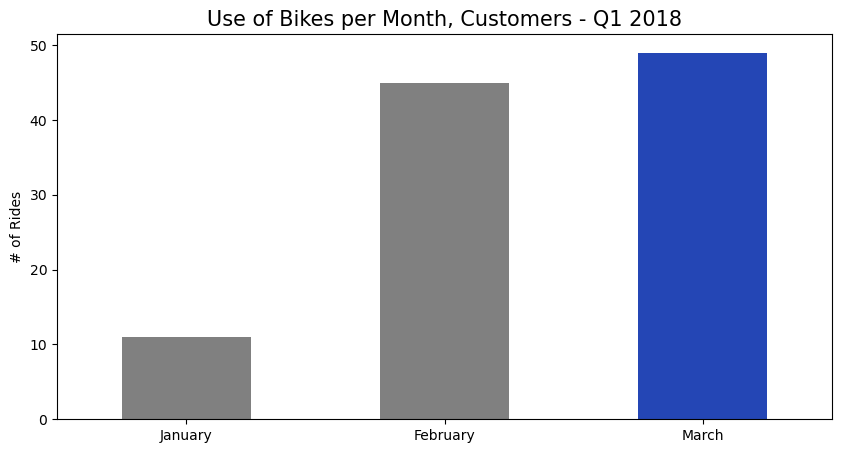

In [141]:
colors = ['gray','gray','#2446b5']
plt.title('Use of Bikes per Month, Customers - Q1 2018',fontsize=15)
customers['start_time'].dt.month_name().value_counts(sort=False).plot(kind='bar',color=colors,figsize=(10,5))
plt.xticks(rotation=0)
plt.ylabel('# of Rides')
plt.show()

In [142]:
pd.DataFrame(subscribers['start_time'].dt.month_name().value_counts())

,start_time
March,142812
January,95308
February,88962


#### Data Transformation

In [143]:
subscribers.groupby(by=subscribers['start_time'].dt.month_name())['duration_min'].mean()

start_time
February    11.028911
January     10.165422
March       10.924544
Name: duration_min, dtype: float64

In [144]:
subs_month = subscribers.groupby(by=subscribers['start_time'].dt.month_name())['duration_min'].mean()

In [145]:
subs_month = pd.DataFrame(subs_month).reset_index()

In [146]:
subs_month.index.name = 'index'

In [147]:
subs_month.rename(index={0:1,1:0,2:2},inplace=True)

In [148]:
subs_month = subs_month.sort_values(by='index')

In [149]:
subs_month.reset_index(drop=True,inplace=True)

###  Average Ride per Month - SUBSCRIBERS

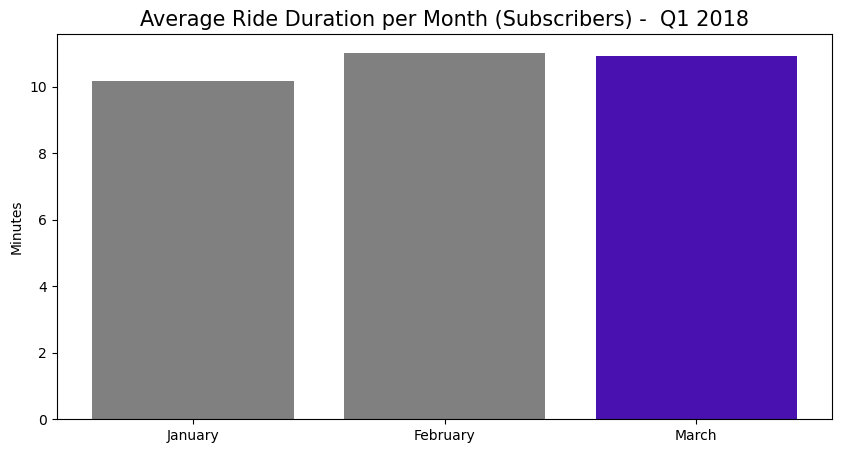

In [150]:
plt.figure(figsize=(10,5))
plt.title('Average Ride Duration per Month (Subscribers) -  Q1 2018',fontsize=15)
plt.bar(x='start_time',height='duration_min',data=subs_month,color=colors_month)
plt.ylabel('Minutes')
plt.show()

#### Data Transformation

In [151]:
customers.groupby(by=customers['start_time'].dt.month_name())['duration_min'].mean()

start_time
February    15.511111
January     19.090909
March       13.040816
Name: duration_min, dtype: float64

In [152]:
cust_month = customers.groupby(by=customers['start_time'].dt.month_name())['duration_min'].mean()

In [153]:
cust_month = pd.DataFrame(cust_month).reset_index()

In [154]:
cust_month.index.name = 'index'

In [155]:
cust_month.rename(index={0:1,1:0,2:2},inplace=True)

In [156]:
cust_month = cust_month.sort_values(by='index')

In [157]:
cust_month.reset_index(drop=True,inplace=True)

###  Average Ride per Month - CUSTOMERS

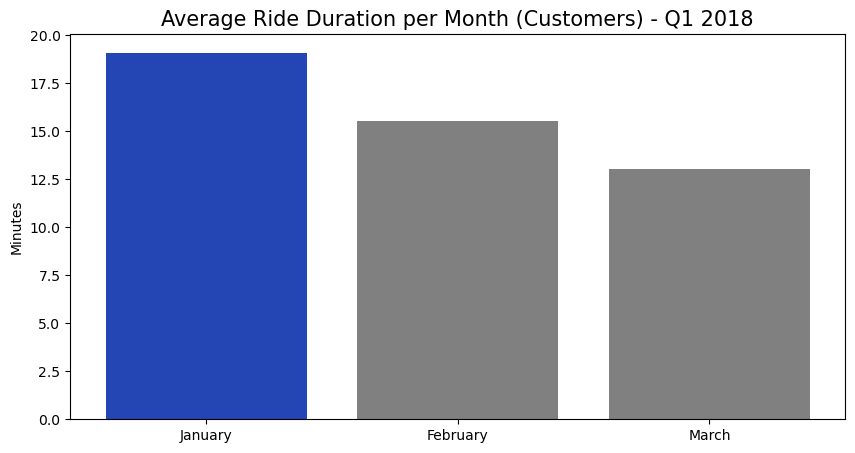

In [158]:
colors3 = ['#2446b5','gray','gray']
plt.figure(figsize=(10,5))
plt.title('Average Ride Duration per Month (Customers) - Q1 2018',fontsize=15)
plt.bar(x='start_time',height='duration_min',data=cust_month,color=colors3)
plt.ylabel('Minutes')
plt.show()

In [159]:
times = pd.DataFrame(df['start_time'].dt.time)

In [160]:
times['month'] = df['start_time'].dt.month

In [161]:
times.head(2)

,start_time,month
0,00:12:00,1
1,00:41:35,1


In [162]:
# plt.title('Times of Highest Use - Q1 2024')
# times.groupby(by=['month'])['start_time'].value_counts().plot(figsize=(13,5))
# plt.xlabel('Month and Date')
# plt.ylabel('# of Uses')
# plt.show()

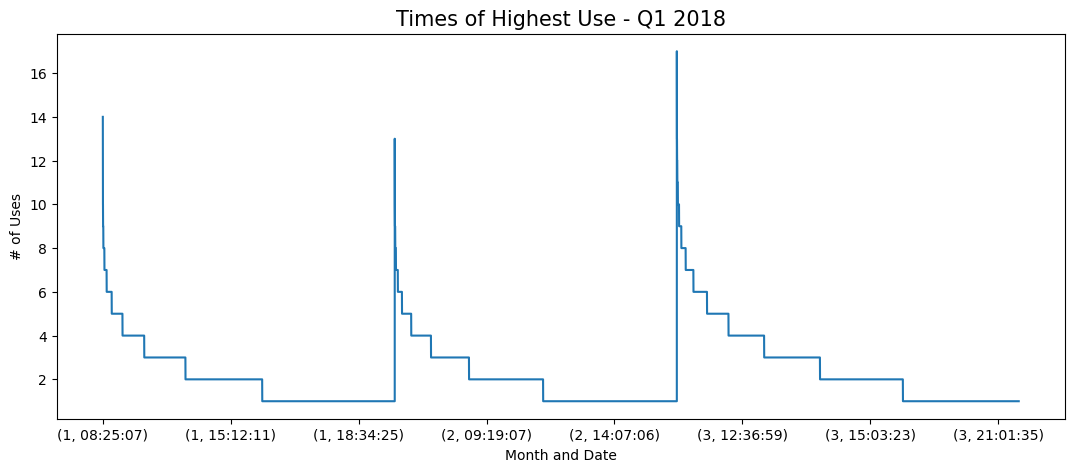

In [163]:
plt.title('Times of Highest Use - Q1 2018',fontsize=15)
times.groupby(by=['month'])['start_time'].value_counts().plot(figsize=(13,5))
plt.xlabel('Month and Date')
plt.ylabel('# of Uses')
plt.show()

In [164]:
df['start_time'].dt.day.value_counts().sort_values(ascending=False)

26    17781
27    16978
28    15291
22    15213
23    13932
19    12603
21    12098
16    12095
15    11915
8     11806
20    10988
12    10961
14    10932
25    10713
9     10255
2      9970
18     9836
13     9473
24     9272
30     9171
29     9043
10     8399
7      8324
5      8294
6      8240
31     7809
1      7730
17     7631
3      7415
11     7136
4      5883
Name: start_time, dtype: int64

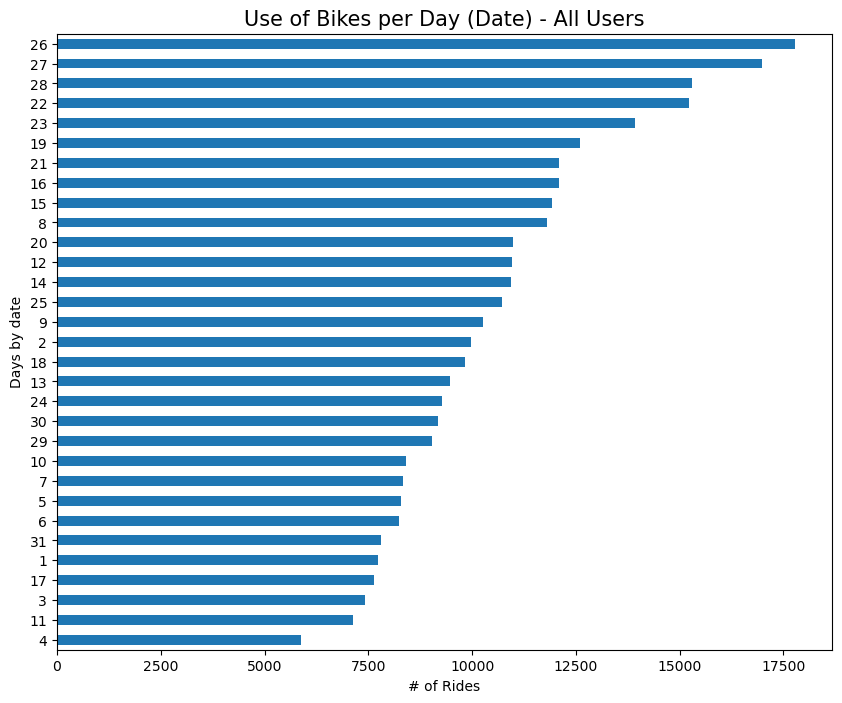

In [165]:
plt.title('Use of Bikes per Day (Date) - All Users',fontsize=15)
df['start_time'].dt.day.value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,8),fontsize=10)
plt.ylabel('Days by date')
plt.xlabel('# of Rides')
plt.show()

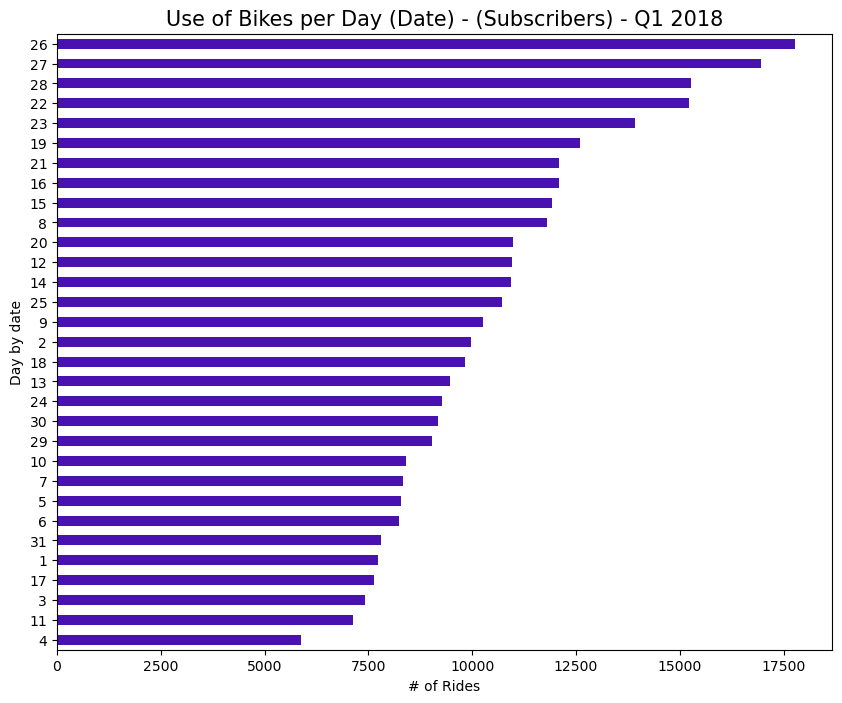

In [166]:
plt.title('Use of Bikes per Day (Date) - (Subscribers) - Q1 2018',fontsize=15)
subscribers['start_time'].dt.day.value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,8),color=['#4912b0'])
plt.ylabel('Day by date')
plt.xlabel('# of Rides')
plt.show()

In [167]:
subscribers['start_time'].dt.day.value_counts().head(10) #top subscribers per day

26    17776
27    16962
28    15259
22    15212
23    13931
19    12599
21    12097
16    12094
15    11914
8     11804
Name: start_time, dtype: int64

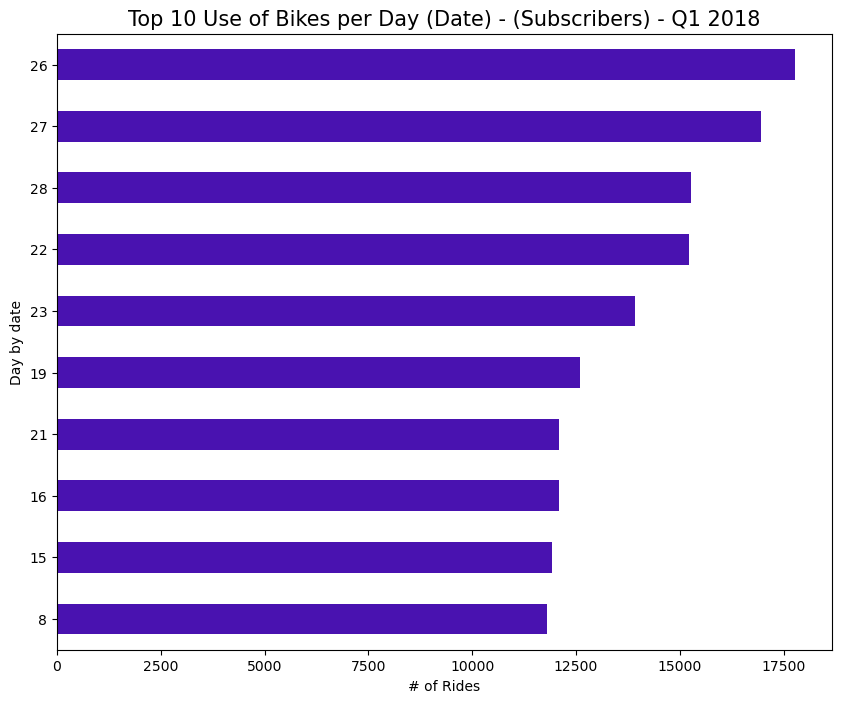

In [168]:
plt.title('Top 10 Use of Bikes per Day (Date) - (Subscribers) - Q1 2018',fontsize=15)
subscribers['start_time'].dt.day.value_counts().head(10).sort_values(ascending=True).plot(kind='barh',figsize=(10,8),color=['#4912b0'])
plt.ylabel('Day by date')
plt.xlabel('# of Rides')
plt.show()

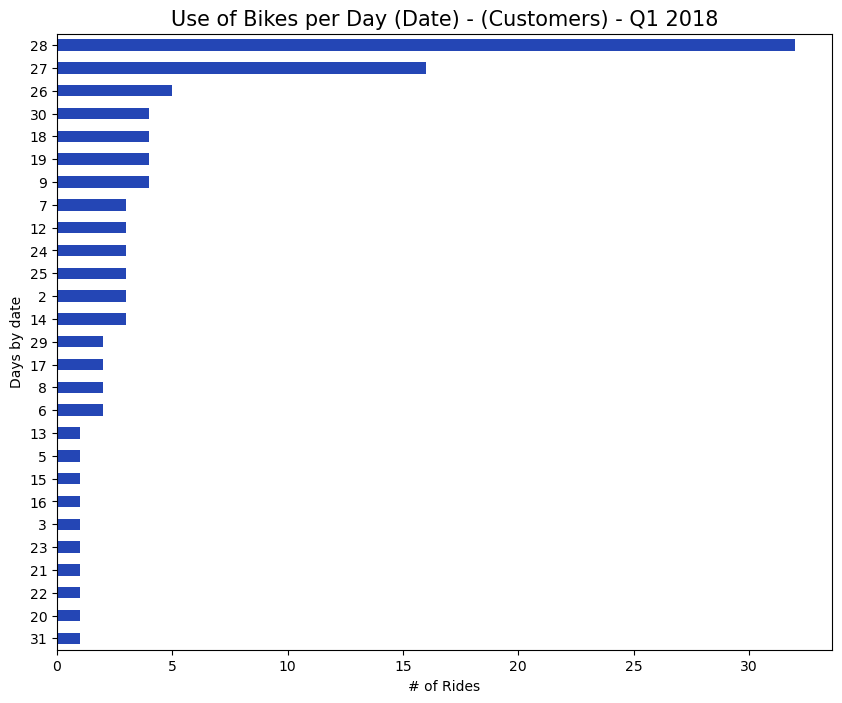

In [169]:
plt.title('Use of Bikes per Day (Date) - (Customers) - Q1 2018',fontsize=15)
customers['start_time'].dt.day.value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,8),
                                                                               color='#2446b5')
plt.ylabel('Days by date')
plt.xlabel('# of Rides')
plt.show()

In [170]:
customers['start_time'].dt.day.value_counts().head(10).sort_values(ascending=False) #top 10 customers per day

28    32
27    16
26     5
30     4
18     4
19     4
9      4
12     3
24     3
25     3
Name: start_time, dtype: int64

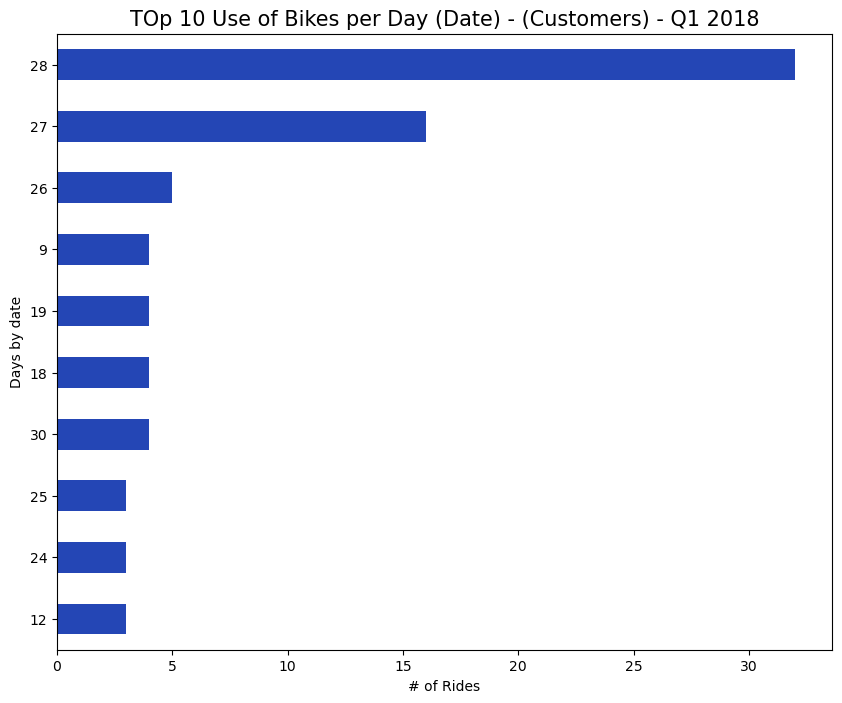

In [171]:
plt.title('TOp 10 Use of Bikes per Day (Date) - (Customers) - Q1 2018',fontsize=15)
customers['start_time'].dt.day.value_counts().head(10).sort_values(ascending=True).plot(kind='barh',figsize=(10,8),
                                                                               color='#2446b5')
plt.ylabel('Days by date')
plt.xlabel('# of Rides')
plt.show()

In [172]:
### age analysis

In [173]:
df['birthday_year'].value_counts().head(20)

1989    20028
1990    18009
1987    17634
1988    17596
1992    17177
1991    16069
1986    15654
1984    15248
1985    14719
1993    13312
1982    12492
1983    12311
1981    10560
1980    10152
1994     9280
1979     8404
1977     8079
1978     7985
1976     7628
1970     7144
Name: birthday_year, dtype: int64

###  Use of Bikes by Birthday

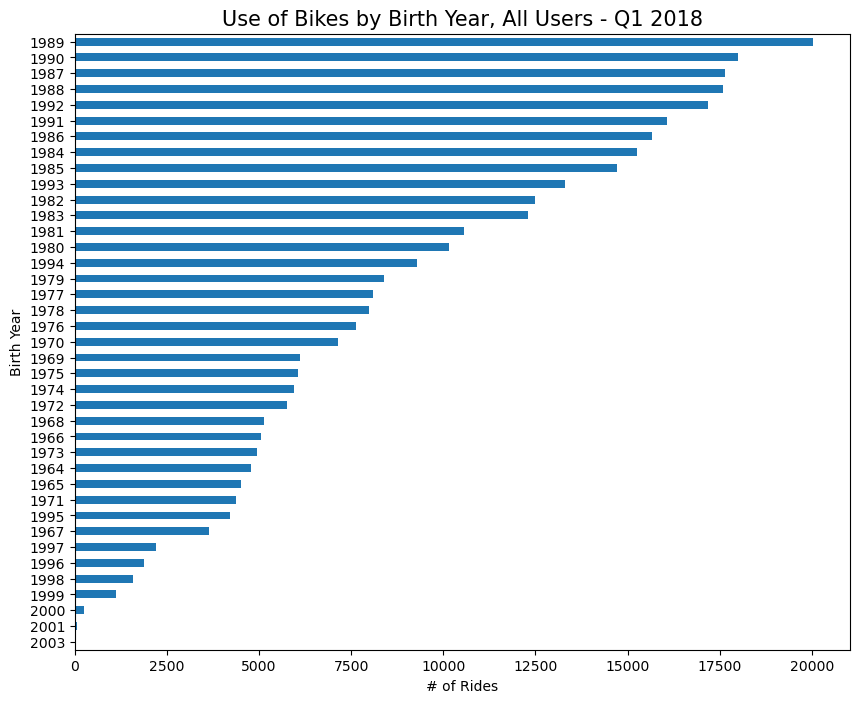

In [174]:
plt.title('Use of Bikes by Birth Year, All Users - Q1 2018',fontsize=15)
df['birthday_year'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,8))
plt.ylabel('Birth Year')
plt.xlabel('# of Rides')
plt.show()

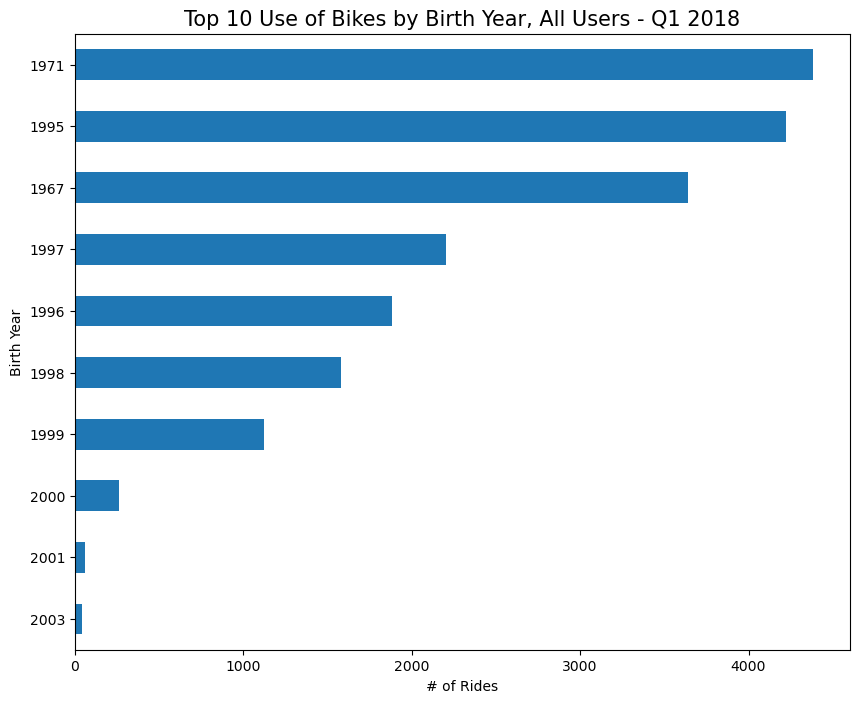

In [175]:
plt.title('Top 10 Use of Bikes by Birth Year, All Users - Q1 2018',fontsize=15)
df['birthday_year'].value_counts().sort_values(ascending=True).head(10).plot(kind='barh',figsize=(10,8))
plt.ylabel('Birth Year')
plt.xlabel('# of Rides')
plt.show()

### WORK

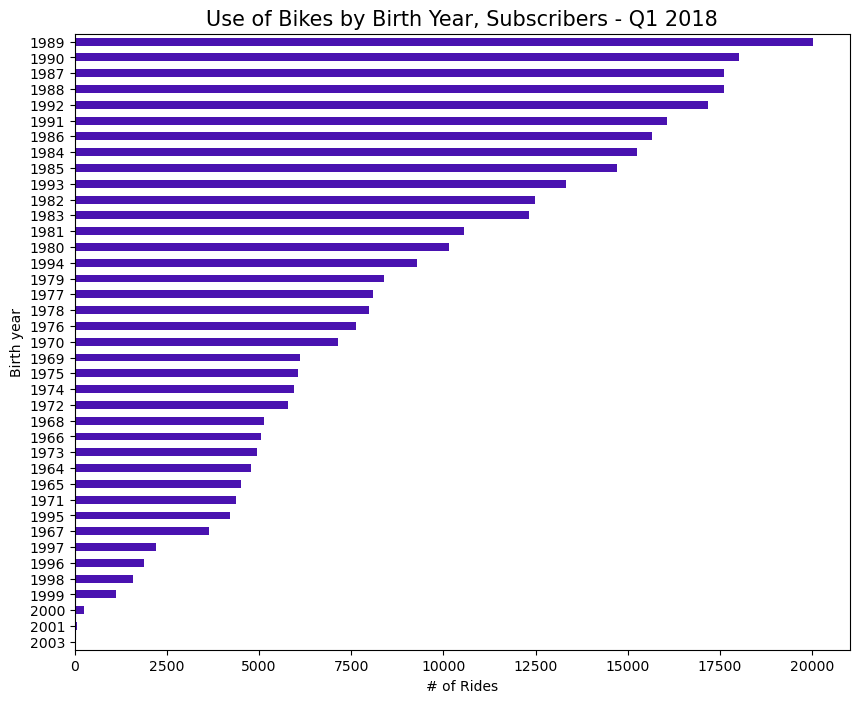

In [176]:
plt.title('Use of Bikes by Birth Year, Subscribers - Q1 2018',fontsize=15)
subscribers['birthday_year'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,8),
                                                                             color=['#4912b0'])
plt.ylabel('Birth year')
plt.xlabel('# of Rides')
plt.show()

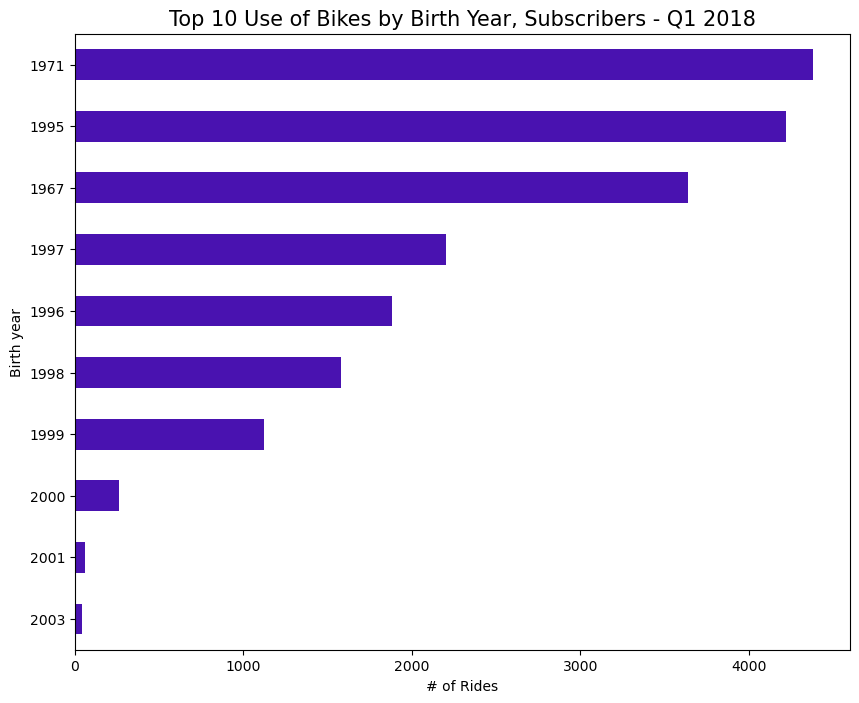

In [177]:
plt.title('Top 10 Use of Bikes by Birth Year, Subscribers - Q1 2018',fontsize=15)
subscribers['birthday_year'].value_counts().sort_values(ascending=True).head(10).plot(kind='barh',figsize=(10,8),
                                                                             color=['#4912b0'])
plt.ylabel('Birth year')
plt.xlabel('# of Rides')
plt.show()

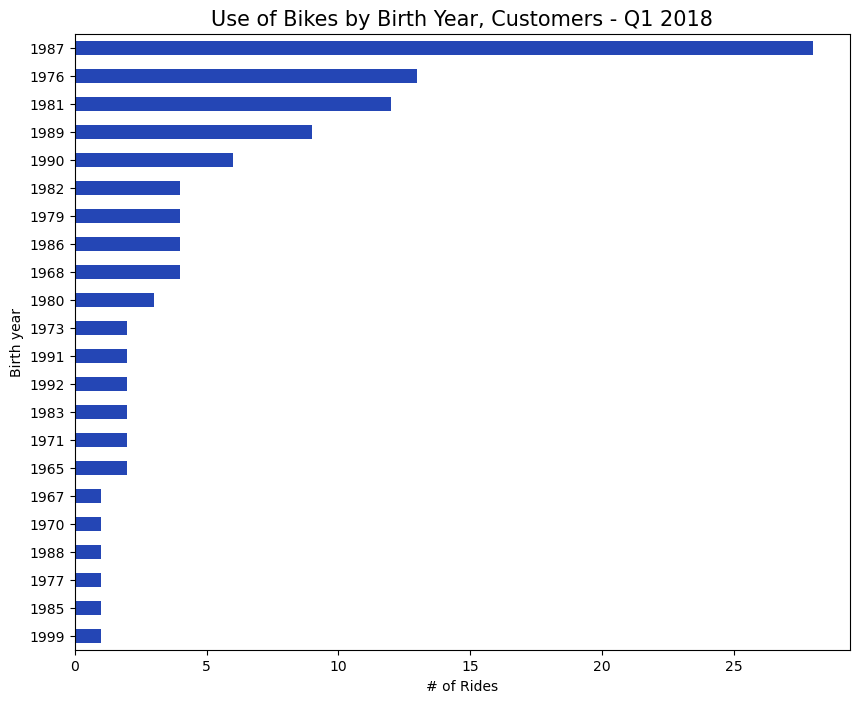

In [178]:
plt.title('Use of Bikes by Birth Year, Customers - Q1 2018',fontsize=15)
customers['birthday_year'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,8),
                                                                           color=['#2446b5'])
plt.ylabel('Birth year')
plt.xlabel('# of Rides')
plt.show()

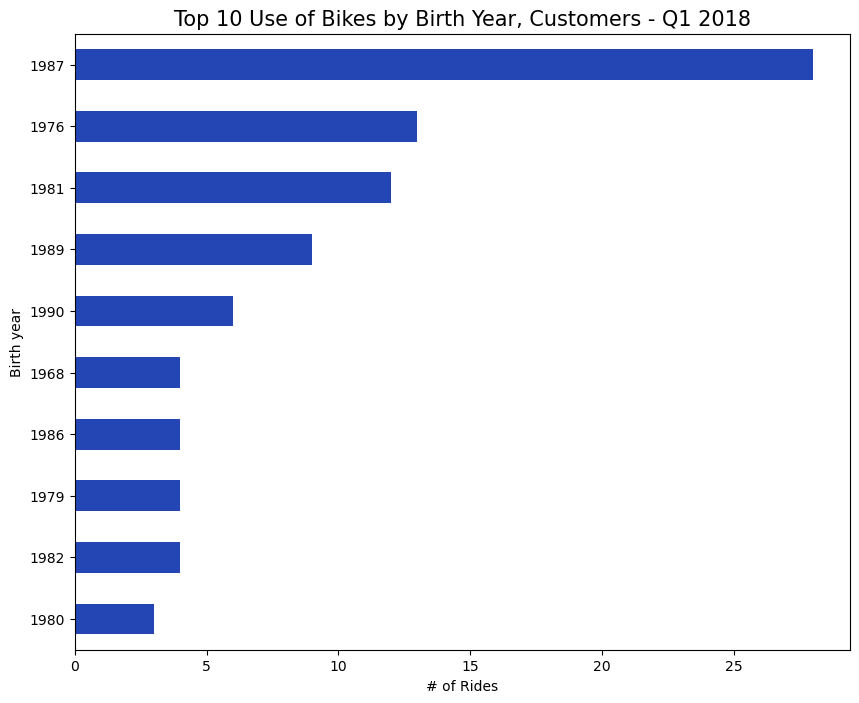

In [179]:
plt.title('Top 10 Use of Bikes by Birth Year, Customers - Q1 2018',fontsize=15)
customers['birthday_year'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh',figsize=(10,8),
                                                                           color=['#2446b5'])
plt.ylabel('Birth year')
plt.xlabel('# of Rides')
plt.show()

### TOP 10 Stations

In [180]:
top_10.sort_values(ascending=False) #top 10 start stations stats

Canal St & Adams St             6995
Clinton St & Washington Blvd    6054
Clinton St & Madison St         5077
Kingsbury St & Kinzie St        4250
Canal St & Madison St           3822
Michigan Ave & Washington St    3436
Larrabee St & Kingsbury St      3430
Franklin St & Monroe St         3334
Columbus Dr & Randolph St       3263
Clinton St & Lake St            3096
Name: start_sta_name, dtype: int64

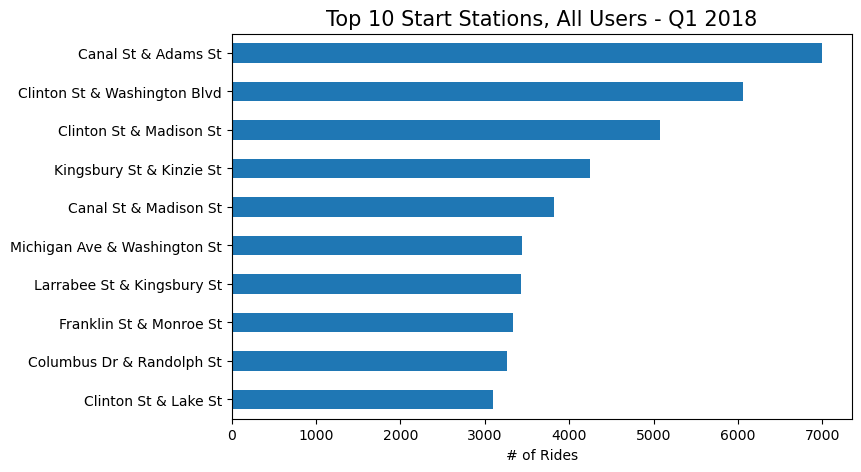

In [181]:
plt.title('Top 10 Start Stations, All Users - Q1 2018',fontsize=15)
top_10.sort_values(ascending=True).plot(kind='barh',figsize=(8,5))
plt.xlabel('# of Rides')
plt.show()

In [182]:
top_10_subs = subscribers['start_sta_name'].value_counts().head(10)

In [183]:
top_10_subs.sort_values(ascending=False) #top 10 start stations, subscribers stats

Canal St & Adams St             6994
Clinton St & Washington Blvd    6053
Clinton St & Madison St         5075
Kingsbury St & Kinzie St        4249
Canal St & Madison St           3822
Michigan Ave & Washington St    3436
Larrabee St & Kingsbury St      3430
Franklin St & Monroe St         3333
Columbus Dr & Randolph St       3257
Clinton St & Lake St            3096
Name: start_sta_name, dtype: int64

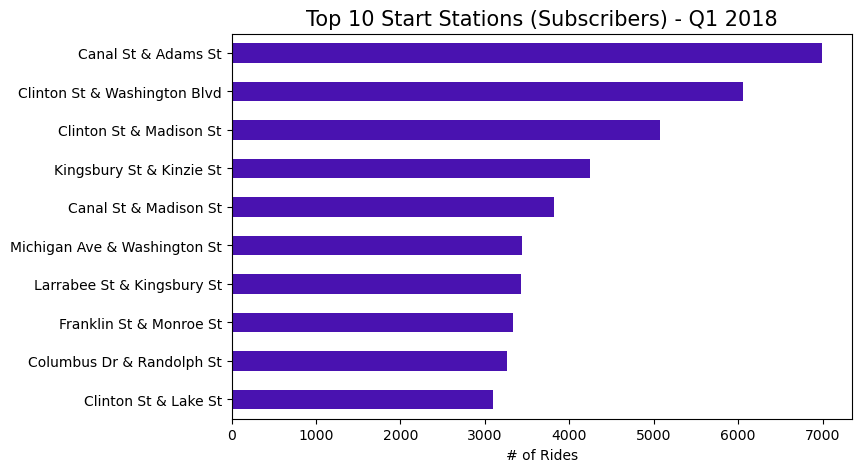

In [184]:
plt.title('Top 10 Start Stations (Subscribers) - Q1 2018',fontsize=15)
top_10_subs.sort_values(ascending=True).plot(kind='barh',figsize=(8,5),color=['#4912b0'])
plt.xlabel('# of Rides')
plt.show()

In [185]:
top_10_cust = customers['start_sta_name'].value_counts().head(10)

In [186]:
top_10_cust.sort_values(ascending=False) #top 10 start stations, subscribers stats

Lake Shore Dr & Monroe St     8
Columbus Dr & Randolph St     6
Shedd Aquarium                4
Dearborn St & Erie St         4
Wood St & Taylor St           4
LaSalle St & Illinois St      3
Green St & Randolph St        3
Canal St & Jackson Blvd       3
Streeter Dr & Grand Ave       3
Aberdeen St & Jackson Blvd    3
Name: start_sta_name, dtype: int64

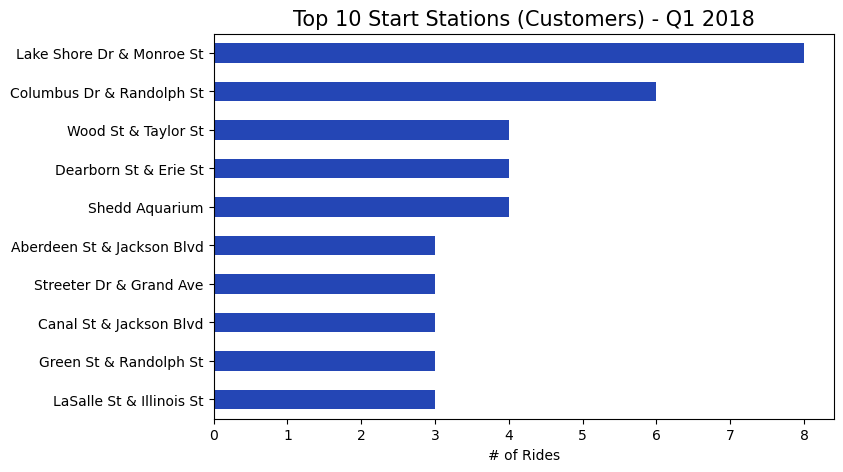

In [187]:
plt.title('Top 10 Start Stations (Customers) - Q1 2018',fontsize=15)
top_10_cust.sort_values(ascending=True).plot(kind='barh',color='#2446b5',figsize=(8,5))
plt.xlabel('# of Rides')
plt.show()

### WORK

In [188]:
top_10_end_subs = subscribers['end_sta_name'].value_counts().head(10)

In [189]:
top_10_end_subs.sort_values(ascending=False) # top 10 end stations, subs stats

Canal St & Adams St             7503
Clinton St & Madison St         6161
Clinton St & Washington Blvd    5435
Kingsbury St & Kinzie St        4350
Canal St & Madison St           4017
Michigan Ave & Washington St    3720
Clinton St & Lake St            3370
Larrabee St & Kingsbury St      3280
Daley Center Plaza              3021
Franklin St & Monroe St         2752
Name: end_sta_name, dtype: int64

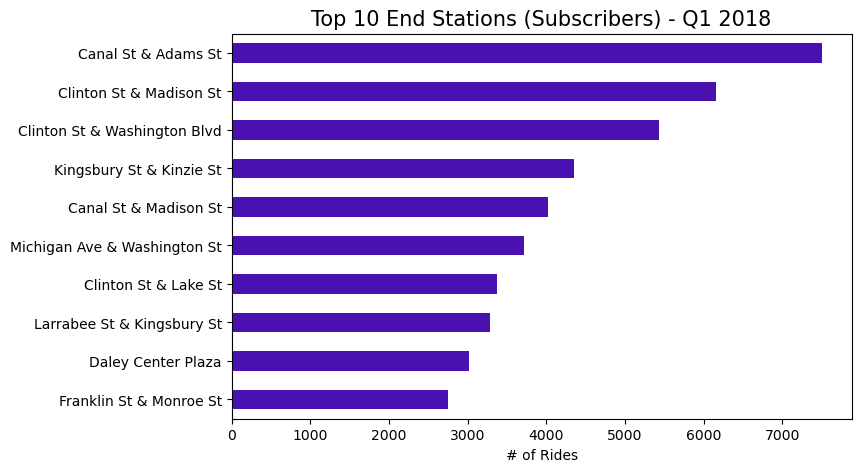

In [190]:
plt.title('Top 10 End Stations (Subscribers) - Q1 2018',fontsize=15)
top_10_end_subs.sort_values(ascending=True).plot(kind='barh',figsize=(8,5),color='#4912b0')
plt.xlabel('# of Rides')
plt.show()

In [191]:
top_10_end_cust = customers['end_sta_name'].value_counts().head(10)

In [192]:
top_10_end_cust.sort_values(ascending=False) #top 10 end stations, customers stats

Adler Planetarium            6
Shedd Aquarium               6
Lake Shore Dr & Monroe St    5
Dearborn St & Erie St        5
Columbus Dr & Randolph St    4
Canal St & Jackson Blvd      4
Streeter Dr & Grand Ave      3
McClurg Ct & Illinois St     3
Clinton St & Madison St      3
Wood St & Taylor St          3
Name: end_sta_name, dtype: int64

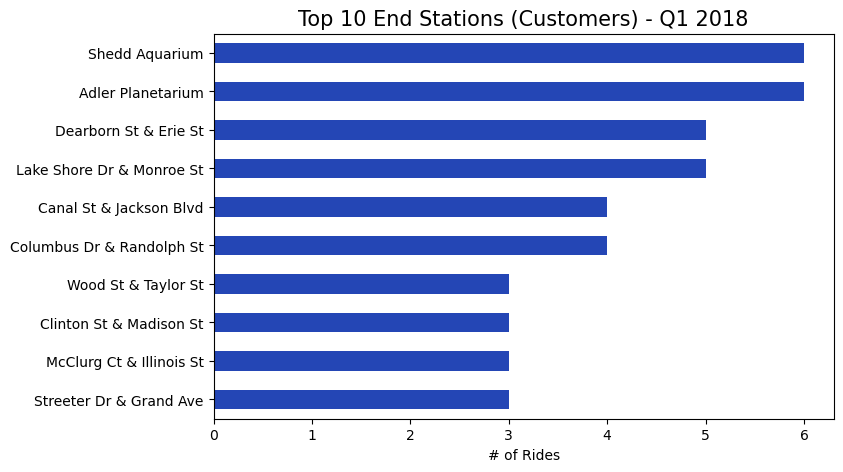

In [193]:
plt.title('Top 10 End Stations (Customers) - Q1 2018',fontsize=15)
top_10_end_cust.sort_values(ascending=True).plot(kind='barh',figsize=(8,5),color='#2446b5')
plt.xlabel('# of Rides')
plt.show()

###  END

In [194]:
pd.DataFrame(top_10_subs) #top 10 start stations - subscribers

,start_sta_name
Canal St & Adams St,6994
Clinton St & Washington Blvd,6053
Clinton St & Madison St,5075
Kingsbury St & Kinzie St,4249
Canal St & Madison St,3822
Michigan Ave & Washington St,3436
Larrabee St & Kingsbury St,3430
Franklin St & Monroe St,3333
Columbus Dr & Randolph St,3257
Clinton St & Lake St,3096


In [195]:
pd.DataFrame(top_10_cust) #top 10 start stations - customers

,start_sta_name
Lake Shore Dr & Monroe St,8
Columbus Dr & Randolph St,6
Shedd Aquarium,4
Dearborn St & Erie St,4
Wood St & Taylor St,4
LaSalle St & Illinois St,3
Green St & Randolph St,3
Canal St & Jackson Blvd,3
Streeter Dr & Grand Ave,3
Aberdeen St & Jackson Blvd,3


### Ride Stats

In [196]:
print('Longest ride:', df['duration_min'].max())
print('Shortest ride:', df['duration_min'].min())
print('Average ride:', df['duration_min'].mean().round())

Longest ride: 3837
Shortest ride: 1
Average ride: 11.0


#####  Subscribers

In [197]:
print('Ride Stats Subscribers')
print('Longest ride:',subscribers['duration_min'].max())
print('Shortest ride:', subscribers['duration_min'].min())
print('Average ride:', subscribers['duration_min'].mean().round())

Ride Stats Subscribers
Longest ride: 3837
Shortest ride: 1
Average ride: 11.0


In [198]:
3837 / 60 #hours

63.95

In [199]:
63.95 / 24 #days

2.6645833333333333

##### Customers

In [200]:
print('Ride Stats Customer')
print('Longest ride:',customers['duration_min'].max())
print('Shortest ride:', customers['duration_min'].min())
print('Average ride:', customers['duration_min'].mean().round())

Ride Stats Customer
Longest ride: 73
Shortest ride: 3
Average ride: 15.0


In [201]:
#df.to_csv('bikes.cleaned.csv')

###  WORK

In [202]:
subs_time = subscribers['start_time'].dt.time.value_counts()

In [203]:
subs_time = pd.DataFrame(subs_time)

In [204]:
subs_time

,start_time
17:09:17,32
17:07:18,30
17:13:00,29
17:39:08,27
17:21:34,27
...,...
22:50:41,1
22:52:33,1
22:52:52,1
22:56:22,1


In [205]:
subs_time[subs_time['start_time'] >= 10] # times for subs stats

,start_time
17:09:17,32
17:07:18,30
17:13:00,29
17:39:08,27
17:21:34,27
...,...
08:16:19,10
08:18:51,10
07:58:18,10
08:36:52,10


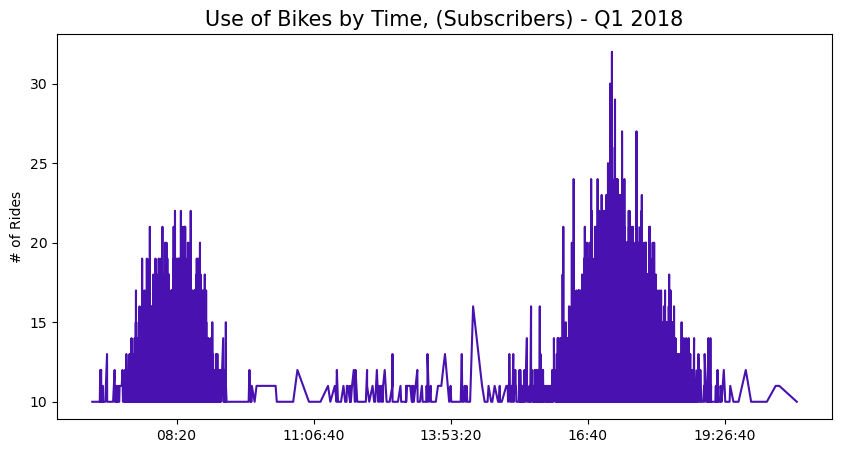

In [206]:
subs_time[subs_time['start_time'] >= 10].plot(figsize=(10,5),legend=None,color='#4912b0')
plt.title('Use of Bikes by Time, (Subscribers) - Q1 2018',fontsize=15)
plt.ylabel('# of Rides')
plt.xlabel(None)
plt.show()

In [207]:
cust_time = customers['start_time'].dt.time.value_counts()

In [208]:
cust_time = pd.DataFrame(cust_time)

In [209]:
cust_time

,start_time
13:39:05,1
21:12:06,1
14:15:08,1
18:34:26,1
18:47:04,1
...,...
10:54:43,1
10:54:14,1
09:57:33,1
09:55:19,1


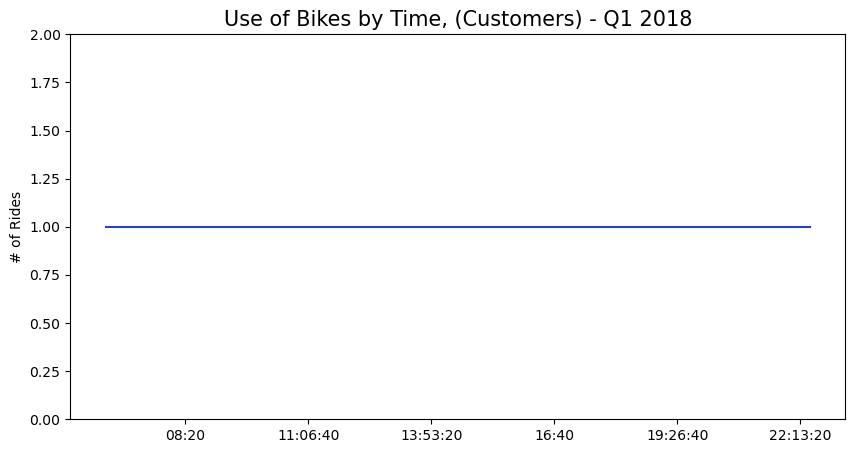

In [210]:
cust_time['start_time'].plot(figsize=(10,5),legend=None,color='#2446b5')
plt.title('Use of Bikes by Time, (Customers) - Q1 2018',fontsize=15)
plt.ylim(0,2)
plt.ylabel('# of Rides')
plt.xlabel(None)
plt.show()

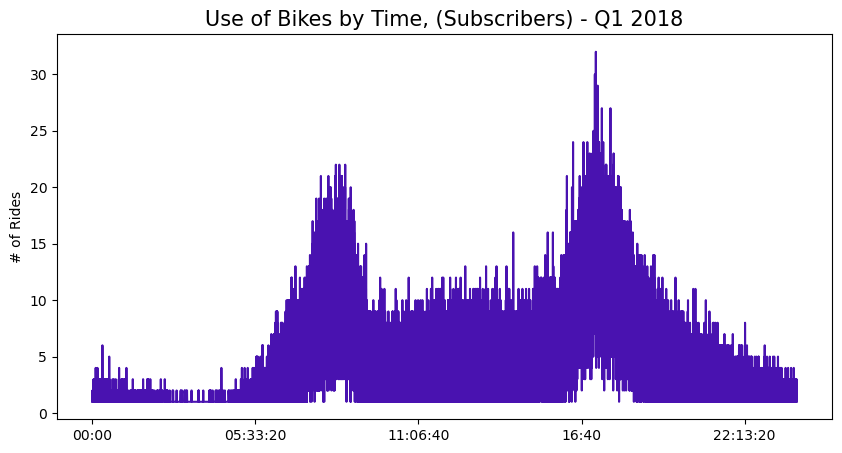

In [211]:
subs_time['start_time'].plot(figsize=(10,5),legend=None,color='#4912b0')
plt.title('Use of Bikes by Time, (Subscribers) - Q1 2018',fontsize=15)
plt.ylabel('# of Rides')
plt.xlabel(None)
plt.show()

In [212]:
customers.groupby(by='gender')['birthday_year'].value_counts()

gender  birthday_year
Female  1989              7
        1990              5
        1991              2
        1970              1
        1981              1
        1985              1
Male    1987             28
        1976             13
        1981             11
        1968              4
        1979              4
        1982              4
        1986              4
        1980              3
        1965              2
        1971              2
        1973              2
        1983              2
        1989              2
        1992              2
        1967              1
        1977              1
        1988              1
        1990              1
        1999              1
Name: birthday_year, dtype: int64

#### Total subscribers per birth year

In [213]:
subscribers[subscribers['gender'] == 'Male']['birthday_year'].value_counts().sum #total subscribers (male)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 1989    15554
1987    14464
1988    13637
1992    13192
1990    13090
1986    12582
1984    12465
1991    12189
1985    11645
1993    10766
1982    10248
1983    10143
1981     8870
1980     8616
1994     7257
1979     7076
1976     6663
1977     6562
1978     6455
1970     5990
1975     5234
1969     5180
1974     4961
1972     4880
1966     4378
1973     4003
1968     3765
1971     3747
1964     3636
1965     3614
1995     3129
1967     2709
1997     1661
1996     1349
1998     1093
1999      866
2000      179
2001       46
Name: birthday_year, dtype: int64>

In [214]:
subscribers[subscribers['gender'] == 'Female']['birthday_year'].value_counts().sum() ##total subscribers (female)

65188

#### Total customers per birth year

In [215]:
customers[customers['gender'] == 'Male']['birthday_year'].value_counts().sum() #total customers (male)

88

In [216]:
customers[customers['gender'] == 'Female']['birthday_year'].value_counts().sum() #total customers (female)

17

In [217]:
df.groupby(by=['user'])['gender'].value_counts()

user        gender
Customer    Male          88
            Female        17
Subscriber  Male      261894
            Female     65188
Name: gender, dtype: int64

In [219]:
df.groupby(by=['user'])['gender'].value_counts(normalize=True) * 100

user        gender
Customer    Male      83.809524
            Female    16.190476
Subscriber  Male      80.069830
            Female    19.930170
Name: gender, dtype: float64